## Librerias

In [ ]:
import pandas as pd

from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6JsYLGs-Lu6VucJLBsE-Qm1k2v6mUQxeROkEFa2RkeHuntVYP_Fq0
Mounted at /content/drive


## Funciones

In [ ]:
def moving_average(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
  MA = pd.DataFrame(MA)
  MA = pd.concat([MA.loc[1], MA])
  MA = MA.reset_index()
  MA = MA.drop([0,'index'], axis=1)
  df = df.join(MA)
  return df

In [ ]:
def exponential_moving_average(df, n):
  EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name="EMA_" + str(n))
  EMA = pd.DataFrame(EMA)
  EMA = pd.concat([EMA.loc[1], EMA])
  EMA = EMA.reset_index()
  EMA = EMA.drop([0,'index'], axis=1)
  df = df.join(EMA)
  return df

In [ ]:
def momentum(df, n):
  M = pd.Series(df['Close'].diff(n), name="Momentum_"+str(n))
  M = pd.DataFrame(M)
  M = pd.concat([M.loc[1], M])
  M = M.reset_index()
  M = M.drop([0,'index'], axis=1)
  df = df.join(M)
  return df

In [ ]:
def bollinger_bands(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean())
  MSD = pd.Series(df['Close'].rolling(n, min_periods=n).std())
  b1 = 4 * MSD / MA
  B1 = pd.Series(b1, name = "BollingerB_" + str(n))
  B1 = pd.DataFrame(B1)
  B1 = pd.concat([B1.loc[1], B1])
  B1 = B1.reset_index()
  B1 = B1.drop([0,'index'], axis=1)
  df = df.join(B1)
  b2 = (df['Close'] - MA  + 2 * MSD) / (4 * MSD)
  B2 = pd.Series(b2, name='Bollinger%b_'+str(n))
  B2 = pd.DataFrame(B2)
  B2 = pd.concat([B2.loc[1], B2])
  B2 = B2.reset_index()
  B2 = B2.drop([0,'index'], axis=1)
  df = df.join(B2)
  return df

In [ ]:
def stochastic_oscillator(df ,n):
  S0K = pd.Series((df['Close']- df['Low']) / (df['High']-df['Low']), name='S0k_' + str(n))
  S0K = pd.DataFrame(S0K)
  S0K = pd.concat([S0K.loc[1], S0K])
  S0K = S0K.reset_index()
  S0K = S0K.drop([0,'index'], axis=1)
  df = df.join(S0K)
  return df

In [ ]:
def relative_strength_index(df, n):
  i = 0
  UpI = [0]
  DoI = [0]

  while i + 1 <= df.index[-1]:
    UpMove = df.loc[i+1, 'High'] - df.loc[i, 'High']
    DoMove = df.loc[i+1, 'Low'] - df.loc[i, 'Low']
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else:
      UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else:
      DoD = 0
    DoI.append(DoD)
    i = i + 1

  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
  RSI = pd.DataFrame(RSI)
  RSI = pd.concat([RSI.loc[1], RSI])
  RSI = RSI.reset_index()
  RSI = RSI.drop([0,'index'], axis=1)
  df = df.join(RSI)
  return df

In [ ]:
def common_channel_index(df, n):
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(), name='CCI_' + str(n))
  CCI = pd.DataFrame(CCI)
  CCI = pd.concat([CCI.loc[1], CCI])
  CCI = CCI.reset_index()
  CCI = CCI.drop([0,'index'], axis=1)
  df = df.join(CCI)
  return df

In [ ]:
def standart_deviation(df, n):
  hola = pd.Series(df['Close'].rolling(n, min_periods=n).std(), name='STD_' + str(n))
  hola = pd.DataFrame(hola)
  hola = pd.concat([hola.loc[1], hola])
  hola = hola.reset_index()
  hola = hola.drop([0,'index'], axis=1)
  df.join(hola)
  return df

## Dataframe

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/Bitcoin/df_V3.csv')

In [12]:
df

,Unnamed: 0,Unnamed: 0.1,Open Time,Open,High,Low,Close,Volume,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,Open Gold,OpenDJ,CloseDJ,Close_eth,tipoint,MA_2,EMA_2,Momentum_2,BollingerB_2,Bollinger%b_2,S0k_2,RSI_2,CCI_2,MA_3,EMA_3,Momentum_3,BollingerB_3,Bollinger%b_3,S0k_3,RSI_3,CCI_3,MA_5,EMA_5,Momentum_5,BollingerB_5,Bollinger%b_5,S0k_5,...,Momentum_15,BollingerB_15,Bollinger%b_15,S0k_15,RSI_15,CCI_15,MA_21,EMA_21,Momentum_21,BollingerB_21,Bollinger%b_21,S0k_21,RSI_21,CCI_21,MA_105,EMA_105,Momentum_105,BollingerB_105,Bollinger%b_105,S0k_105,RSI_105,CCI_105,MA_200,EMA_200,Momentum_200,BollingerB_200,Bollinger%b_200,S0k_200,RSI_200,CCI_200,MA_300,EMA_300,Momentum_300,BollingerB_300,Bollinger%b_300,S0k_300,RSI_300,CCI_300,PIB,CPI
0,0,0,2015-10-11,246.30,249.50,246.30,249.50,3021.120000,104550,0.00,0.00,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968
1,1,1,2015-10-12,249.50,249.50,247.60,247.60,9493.890000,134410,2052.23,2047.93,1,1130.3,1130.3,17493.17,17574.75,0.63,0.75,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,1.000000,...,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,54420.0,-0.044968
2,2,2,2015-10-13,247.60,252.87,245.75,250.00,12875.400000,134878,2003.69,2015.00,1,1231.7,1231.7,17113.55,17081.89,0.60,0.75,248.550,248.075000,0.00,0.021621,0.323223,0.000000,0.000000,-0.707107,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968
3,3,3,2015-10-14,250.00,254.75,250.00,253.00,30115.770000,141985,1994.24,2003.66,1,1243.6,1243.6,17079.08,16924.75,0.50,0.75,248.800,249.407692,0.50,0.027284,0.676777,0.596910,0.886065,0.707107,249.033333,249.242857,0.00,0.020338,0.690856,0.596910,0.838308,1.142986,0.000,0.000000,0.00,0.000000,0.000000,0.596910,...,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,54420.0,-0.044968
4,4,4,2015-10-15,253.00,258.98,253.00,255.26,50535.450000,153495,2023.86,1996.47,1,1251.4,1251.4,16944.86,17141.75,0.56,0.75,251.500,251.832500,5.40,0.033739,0.676777,0.631579,0.203584,0.707107,250.200000,251.246667,3.50,0.043254,0.758727,0.631579,0.269169,1.104127,0.000,0.000000,0.00,0.000000,0.000000,0.631579,...,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,54420.0,-0.044968
...,...,

In [13]:
df2 = df.drop(['Open','Unnamed: 0.1','High','Low','Unnamed: 0'], axis=1)

In [14]:
df2['fecha'] = pd.to_datetime(df['Open Time'])

In [15]:
df2

,Open Time,Close,Volume,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,Open Gold,OpenDJ,CloseDJ,Close_eth,tipoint,MA_2,EMA_2,Momentum_2,BollingerB_2,Bollinger%b_2,S0k_2,RSI_2,CCI_2,MA_3,EMA_3,Momentum_3,BollingerB_3,Bollinger%b_3,S0k_3,RSI_3,CCI_3,MA_5,EMA_5,Momentum_5,BollingerB_5,Bollinger%b_5,S0k_5,RSI_5,CCI_5,MA_8,EMA_8,Momentum_8,...,BollingerB_15,Bollinger%b_15,S0k_15,RSI_15,CCI_15,MA_21,EMA_21,Momentum_21,BollingerB_21,Bollinger%b_21,S0k_21,RSI_21,CCI_21,MA_105,EMA_105,Momentum_105,BollingerB_105,Bollinger%b_105,S0k_105,RSI_105,CCI_105,MA_200,EMA_200,Momentum_200,BollingerB_200,Bollinger%b_200,S0k_200,RSI_200,CCI_200,MA_300,EMA_300,Momentum_300,BollingerB_300,Bollinger%b_300,S0k_300,RSI_300,CCI_300,PIB,CPI,fecha
0,2015-10-11,249.50,3021.120000,104550,0.00,0.00,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,2015-10-11
1,2015-10-12,247.60,9493.890000,134410,2052.23,2047.93,1,1130.3,1130.3,17493.17,17574.75,0.63,0.75,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,54420.0,-0.044968,2015-10-12
2,2015-10-13,250.00,12875.400000,134878,2003.69,2015.00,1,1231.7,1231.7,17113.55,17081.89,0.60,0.75,248.550,248.075000,0.00,0.021621,0.323223,0.000000,0.000000,-0.707107,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,2015-10-13
3,2015-10-14,253.00,30115.770000,141985,1994.24,2003.66,1,1243.6,1243.6,17079.08,16924.75,0.50,0.75,248.800,249.407692,0.50,0.027284,0.676777,0.596910,0.886065,0.707107,249.033333,249.242857,0.00,0.020338,0.690856,0.596910,0.838308,1.142986,0.000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,54420.0,-0.044968,2015-10-14
4,2015-10-15,255.26,50535.450000,153495,2023.86,1996.47,1,1251.4,1251.4,16944.86,17141.75,0.56,0.75,251.500,251.832500,5.40,0.033739,0.676777,0.631579,0.203584,0.707107,250.200000,251.246667,3.50,0.043254,0.758727,0.631579,0.269169,1.104127,0.000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0

In [16]:
df2['dayofweek'] = df2['fecha'].dt.dayofweek
df2['quarter'] = df2['fecha'].dt.quarter
df2['month'] = df2['fecha'].dt.month
df2['year'] = df2['fecha'].dt.year
df2['dayofyear'] = df2['fecha'].dt.dayofyear
df2['dayofmonth'] = df2['fecha'].dt.day
df2['weekofyear'] = df2['fecha'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [17]:
df2 = df2.drop(['Open Time','fecha'], axis=1)

In [18]:
df2

,Close,Volume,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,Open Gold,OpenDJ,CloseDJ,Close_eth,tipoint,MA_2,EMA_2,Momentum_2,BollingerB_2,Bollinger%b_2,S0k_2,RSI_2,CCI_2,MA_3,EMA_3,Momentum_3,BollingerB_3,Bollinger%b_3,S0k_3,RSI_3,CCI_3,MA_5,EMA_5,Momentum_5,BollingerB_5,Bollinger%b_5,S0k_5,RSI_5,CCI_5,MA_8,EMA_8,Momentum_8,BollingerB_8,...,EMA_21,Momentum_21,BollingerB_21,Bollinger%b_21,S0k_21,RSI_21,CCI_21,MA_105,EMA_105,Momentum_105,BollingerB_105,Bollinger%b_105,S0k_105,RSI_105,CCI_105,MA_200,EMA_200,Momentum_200,BollingerB_200,Bollinger%b_200,S0k_200,RSI_200,CCI_200,MA_300,EMA_300,Momentum_300,BollingerB_300,Bollinger%b_300,S0k_300,RSI_300,CCI_300,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,249.50,3021.120000,104550,0.00,0.00,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,6,4,10,2015,284,11,41
1,247.60,9493.890000,134410,2052.23,2047.93,1,1130.3,1130.3,17493.17,17574.75,0.63,0.75,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,54420.0,-0.044968,0,4,10,2015,285,12,42
2,250.00,12875.400000,134878,2003.69,2015.00,1,1231.7,1231.7,17113.55,17081.89,0.60,0.75,248.550,248.075000,0.00,0.021621,0.323223,0.000000,0.000000,-0.707107,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,54420.0,-0.044968,1,4,10,2015,286,13,42
3,253.00,30115.770000,141985,1994.24,2003.66,1,1243.6,1243.6,17079.08,16924.75,0.50,0.75,248.800,249.407692,0.50,0.027284,0.676777,0.596910,0.886065,0.707107,249.033333,249.242857,0.00,0.020338,0.690856,0.596910,0.838308,1.142986,0.000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.596910,0.000000,0.000000,54420.0,-0.044968,2,4,10,2015,287,14,42
4,255.26,50535.450000,153495,2023.86,1996.47,1,1251.4,1251.4,16944.86,17141.75,0.56,0.75,251.500,251.832500,5.40,0.033739,0.676777,0.631579,0.203584,0.707107,250.200000,251.246667,3.50,0.043254,0.758727,0.631579,0.269169,1.104127,0.000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.631579,0.000000,0.000000,54420.0,-0.044968,3,4,10,2015,288,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Separar para evaluar

## Primeras 10

In [ ]:
primeras10 = df2.iloc[:, 0:10] 

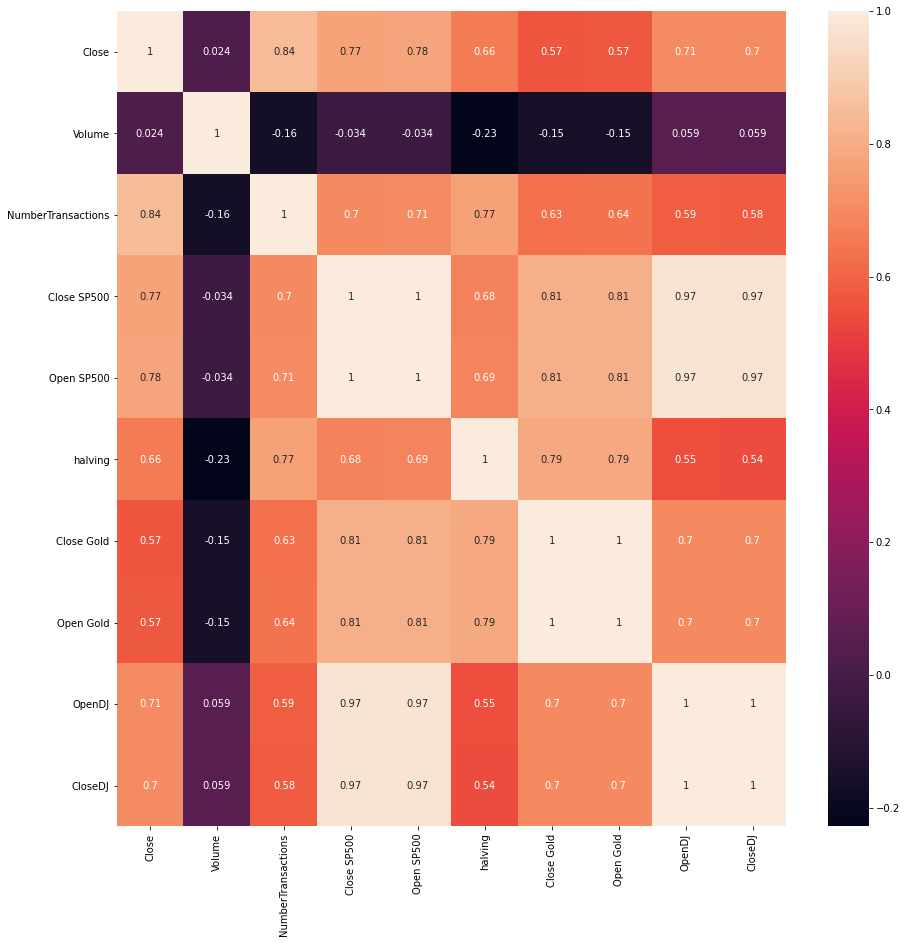

In [ ]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras10 = primeras10.drop(['Volume','Open Gold'], axis=1)

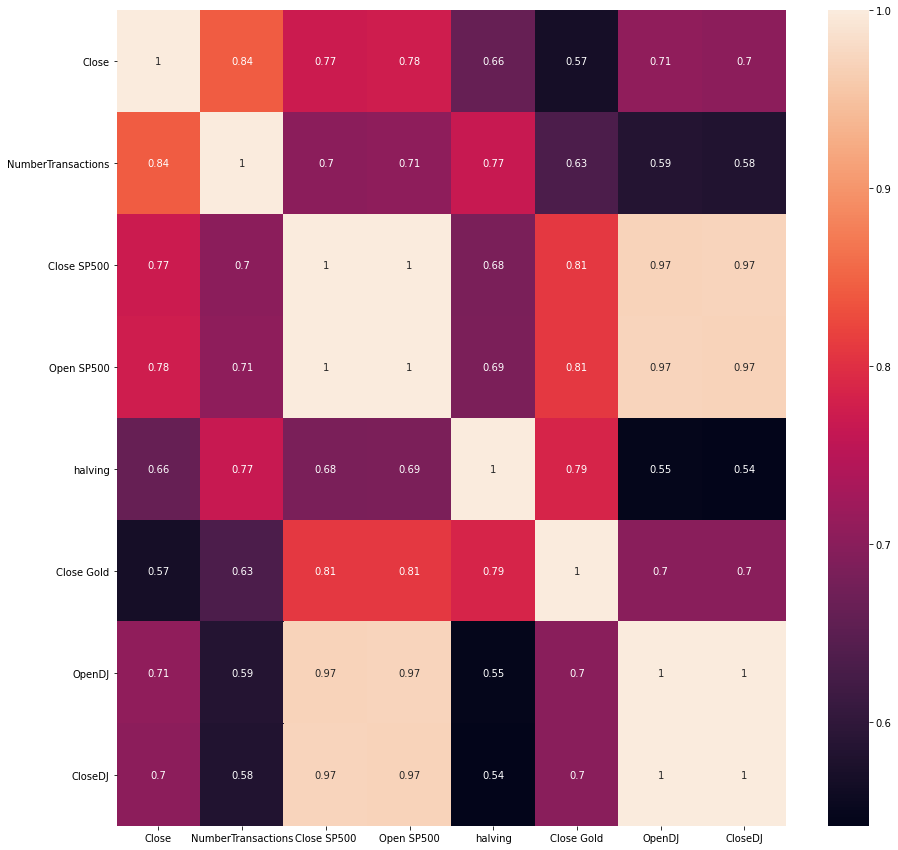

In [ ]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 10:20

In [20]:
primeras20 = df2.iloc[:, 10:20] 

In [21]:
primeras20['Close'] = df2.iloc[:,0]

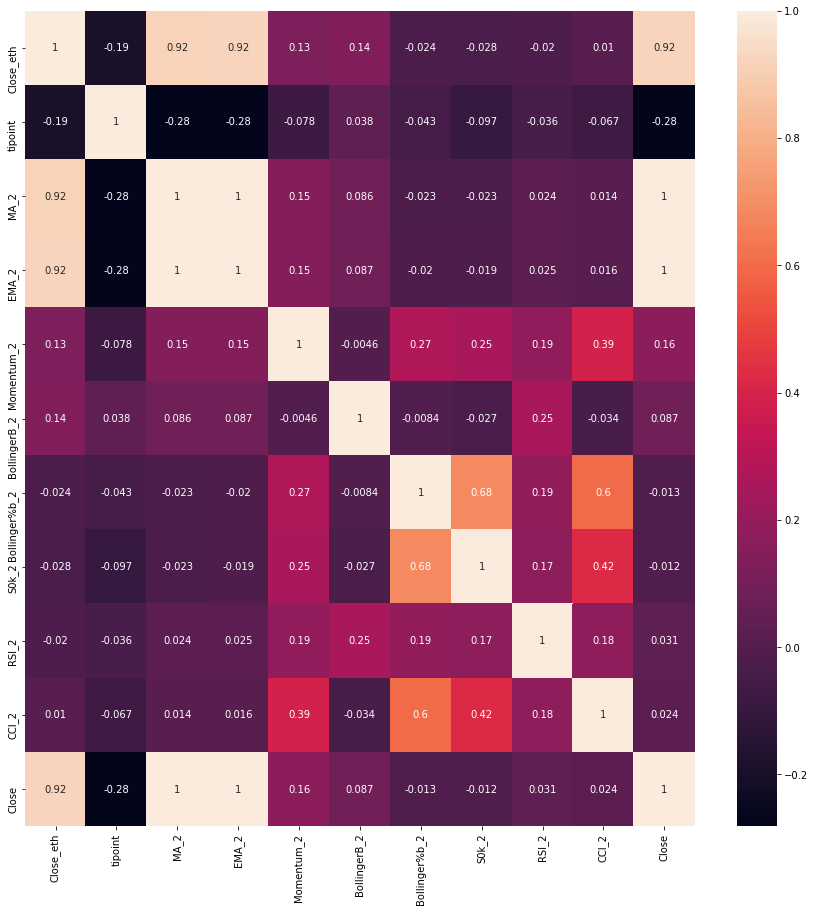

In [22]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
primeras20 = primeras20.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

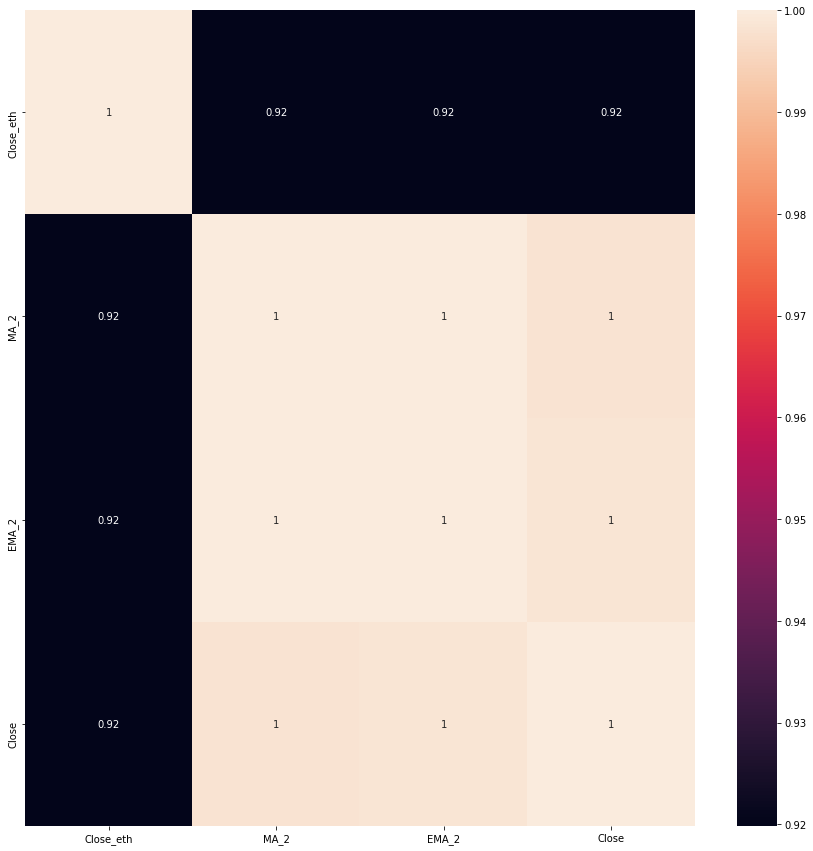

In [24]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 20:30

In [25]:
primeras30 = df2.iloc[:, 20:30]

In [26]:
primeras30['Close'] = df2.iloc[:,0]

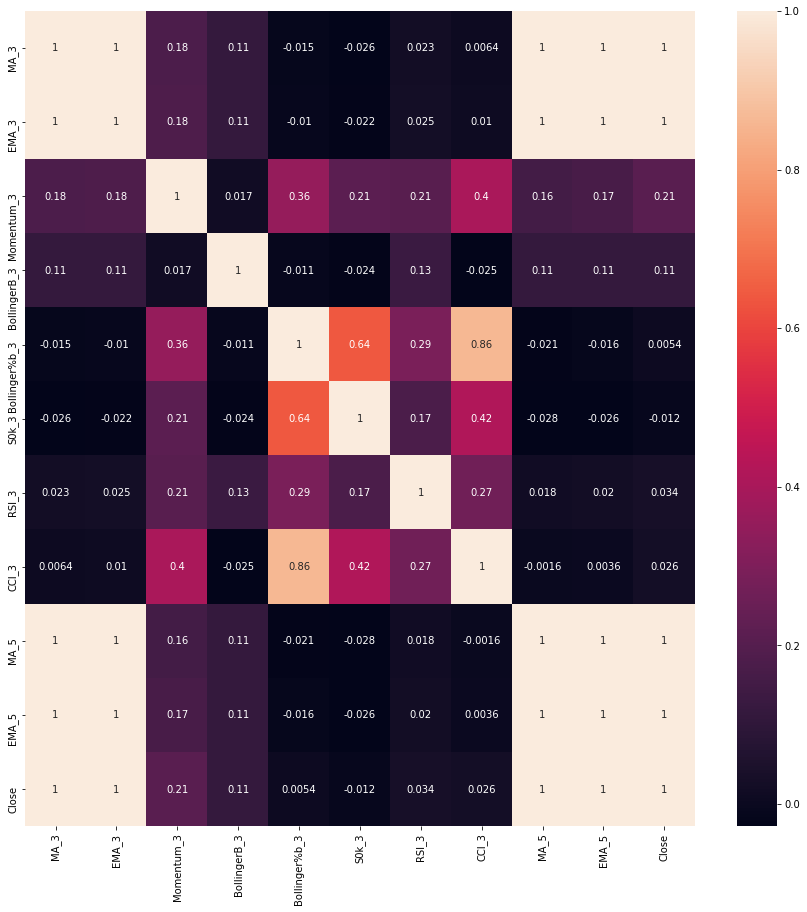

In [27]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [28]:
list(primeras30)

['MA_3',
 'EMA_3',
 'Momentum_3',
 'BollingerB_3',
 'Bollinger%b_3',
 'S0k_3',
 'RSI_3',
 'CCI_3',
 'MA_5',
 'EMA_5',
 'Close']

In [29]:
primeras30 = primeras30.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

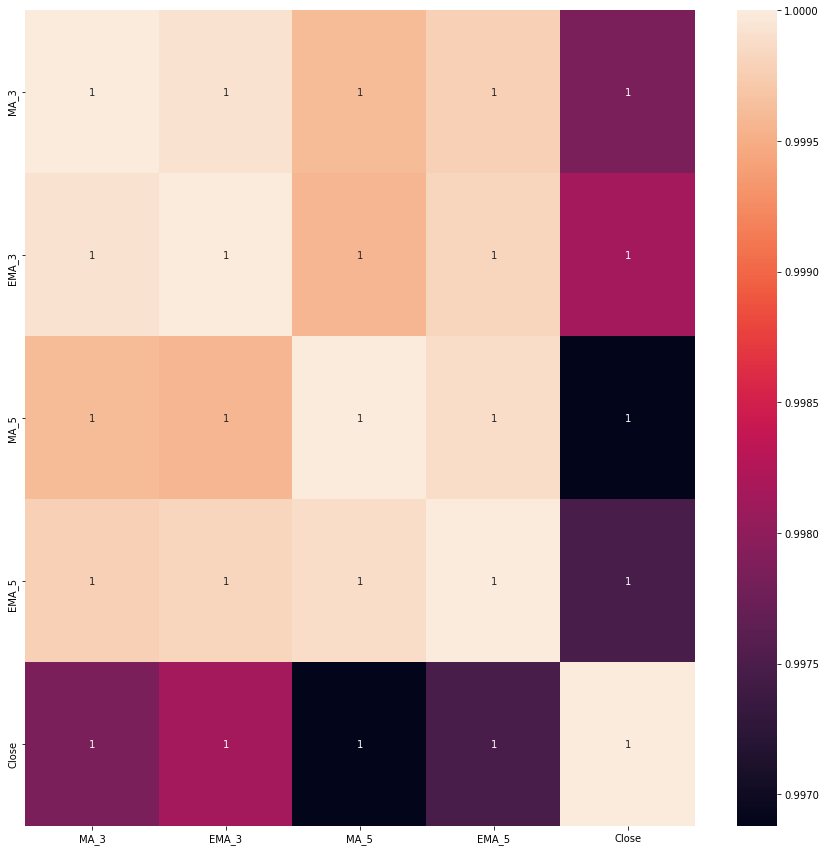

In [30]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 30:40

In [31]:
primeras40 = df2.iloc[:, 30:40]

In [32]:
primeras40['Close'] = df2.iloc[:,0]

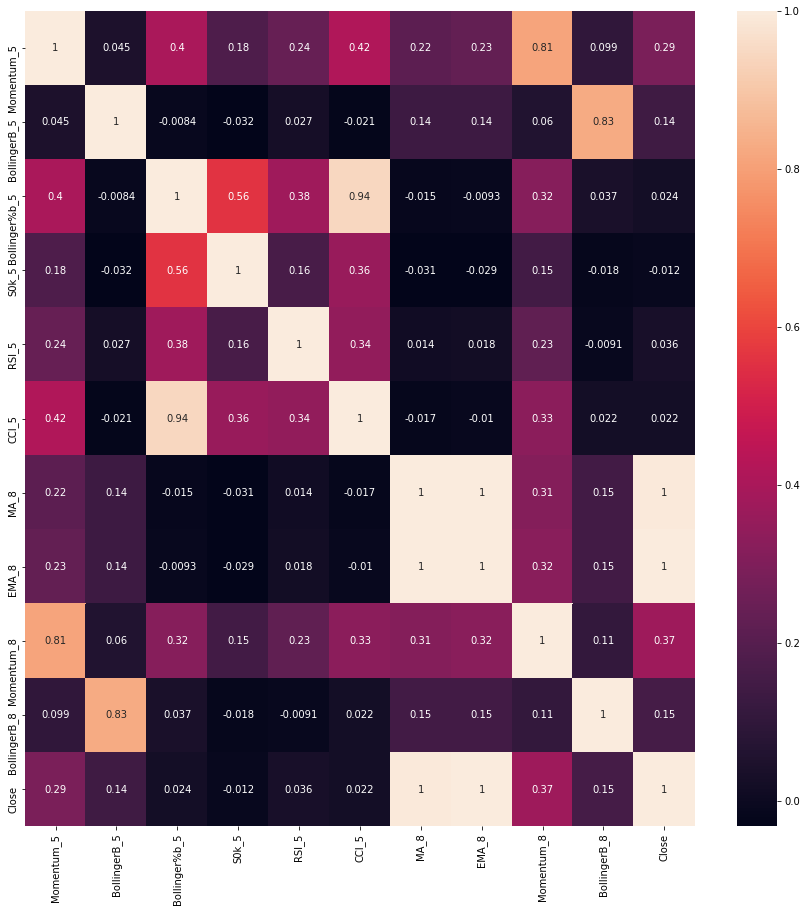

In [33]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [34]:
primeras40 = primeras40.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

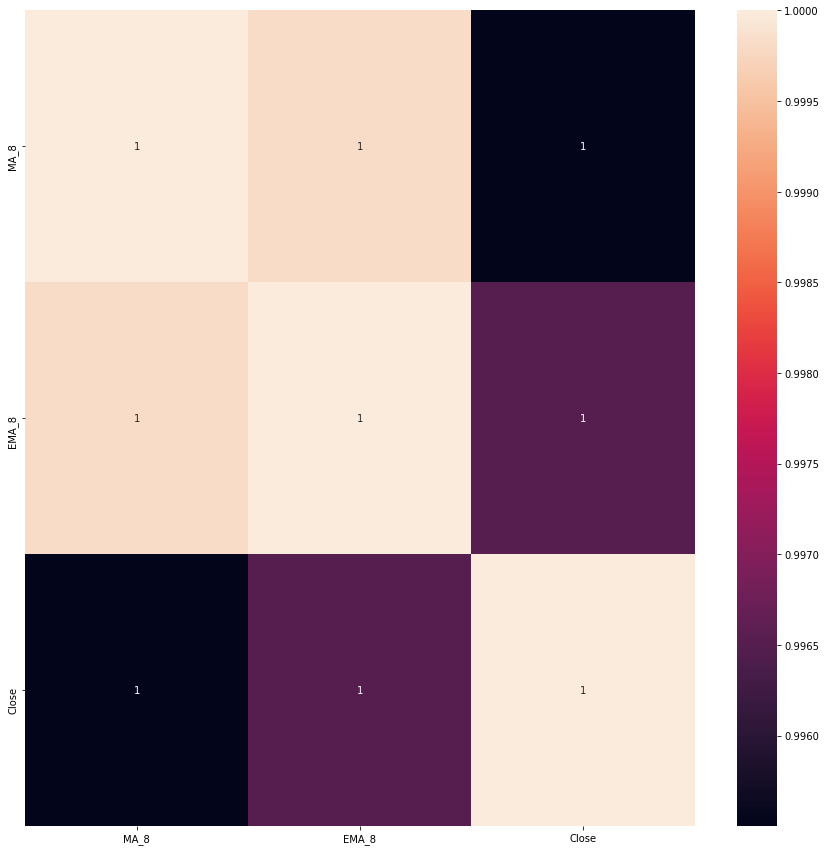

In [35]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 50:60

In [36]:
primeras50 = df2.iloc[:, 50:60]

In [37]:
primeras50['Close'] = df2.iloc[:,0]

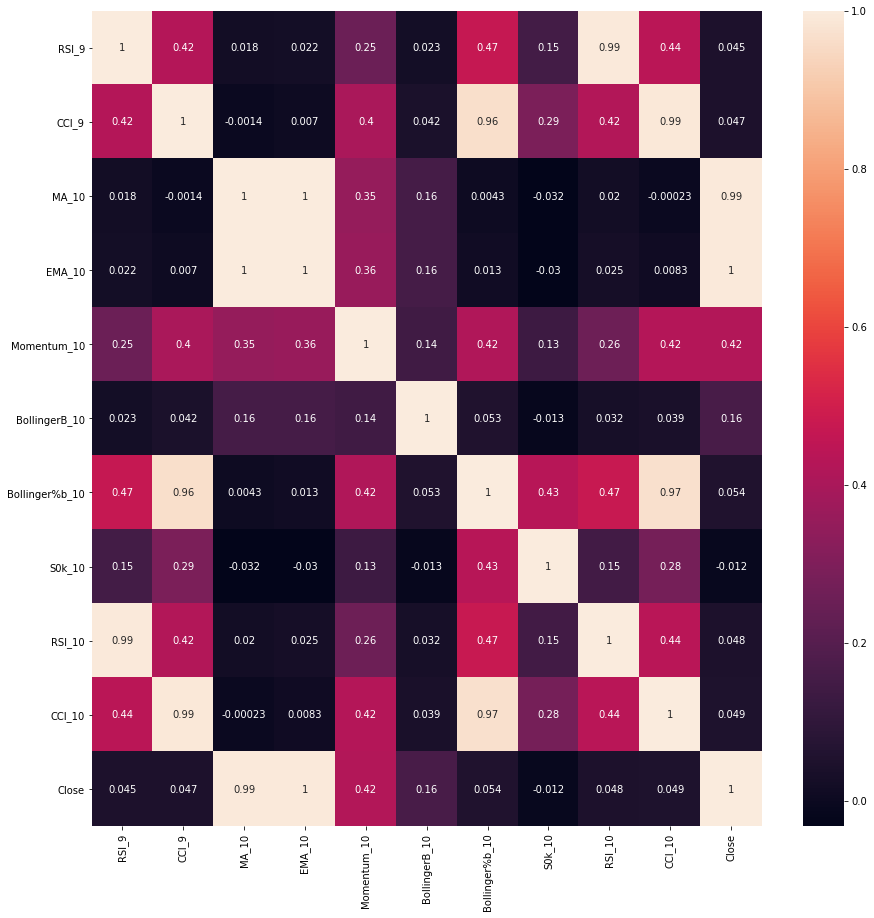

In [38]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [39]:
primeras50 = primeras50.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

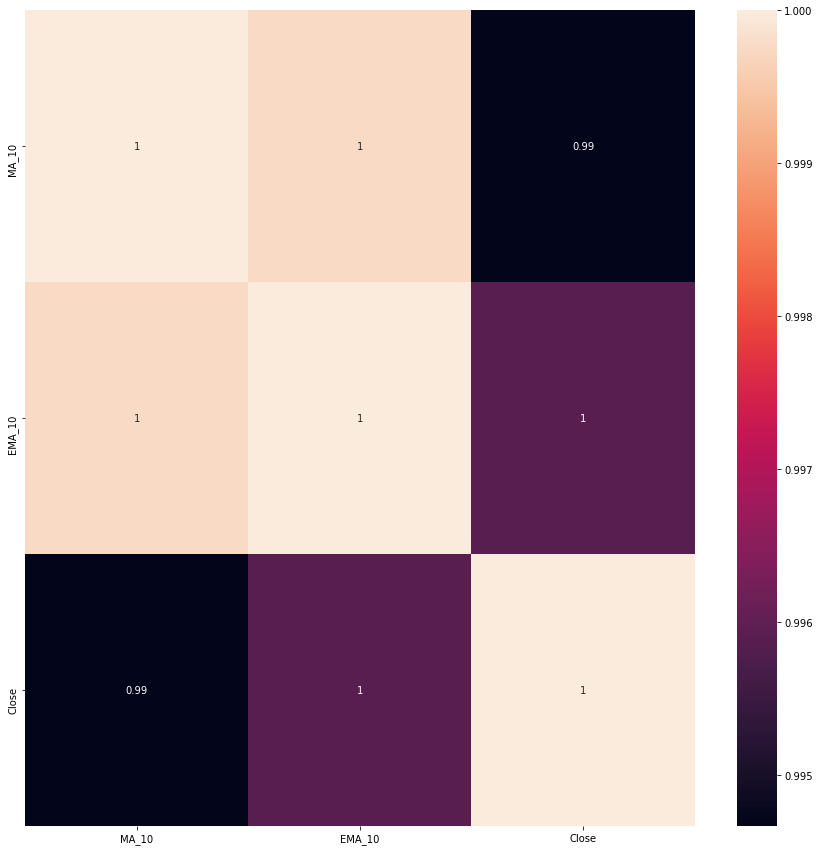

In [40]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 40:50

In [41]:
primeras60 = df2.iloc[:, 40:50]

In [42]:
primeras60['Close'] = df2.iloc[:,0]

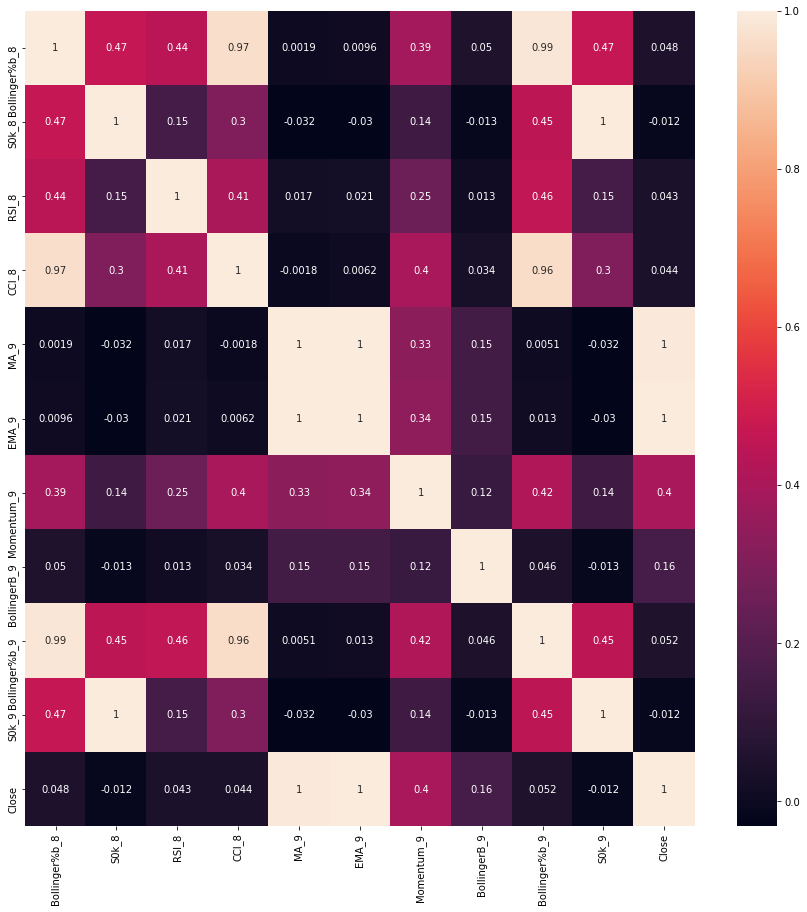

In [43]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [44]:
primeras60 = primeras60.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

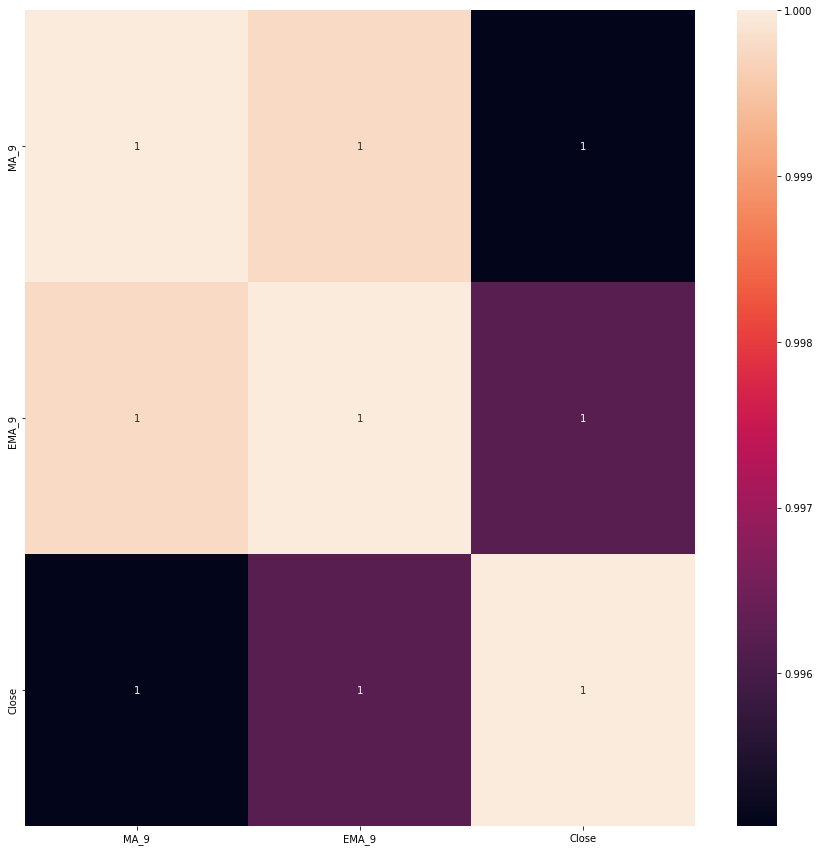

In [45]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 60:70

In [46]:
primeras70 = df2.iloc[:, 60:70]

In [47]:
primeras70['Close'] = df2.iloc[:,0]

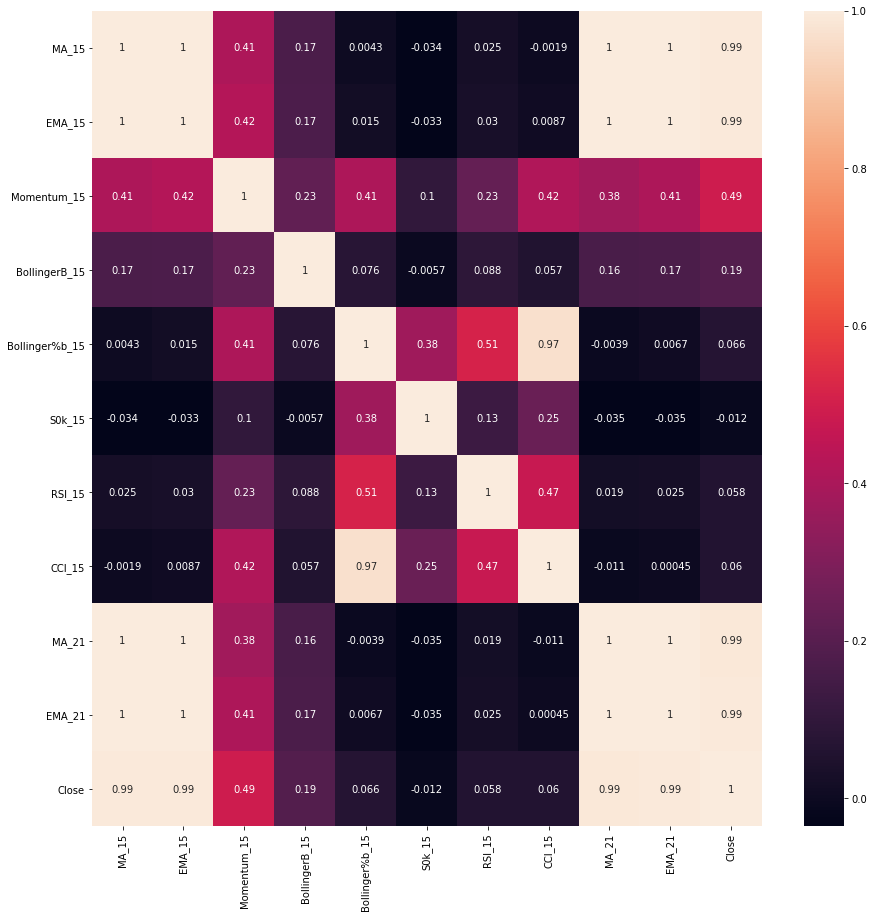

In [48]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [49]:
primeras70 = primeras70.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

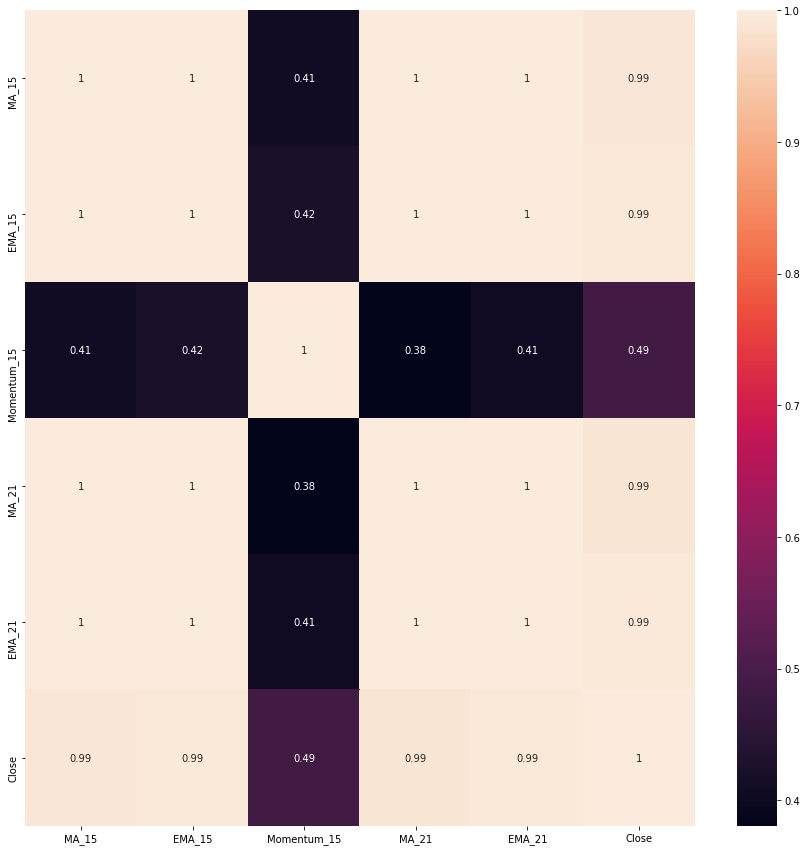

In [50]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 70:80

In [51]:
primeras80 = df2.iloc[:, 70:80]

In [52]:
primeras80['Close'] = df2.iloc[:,0]

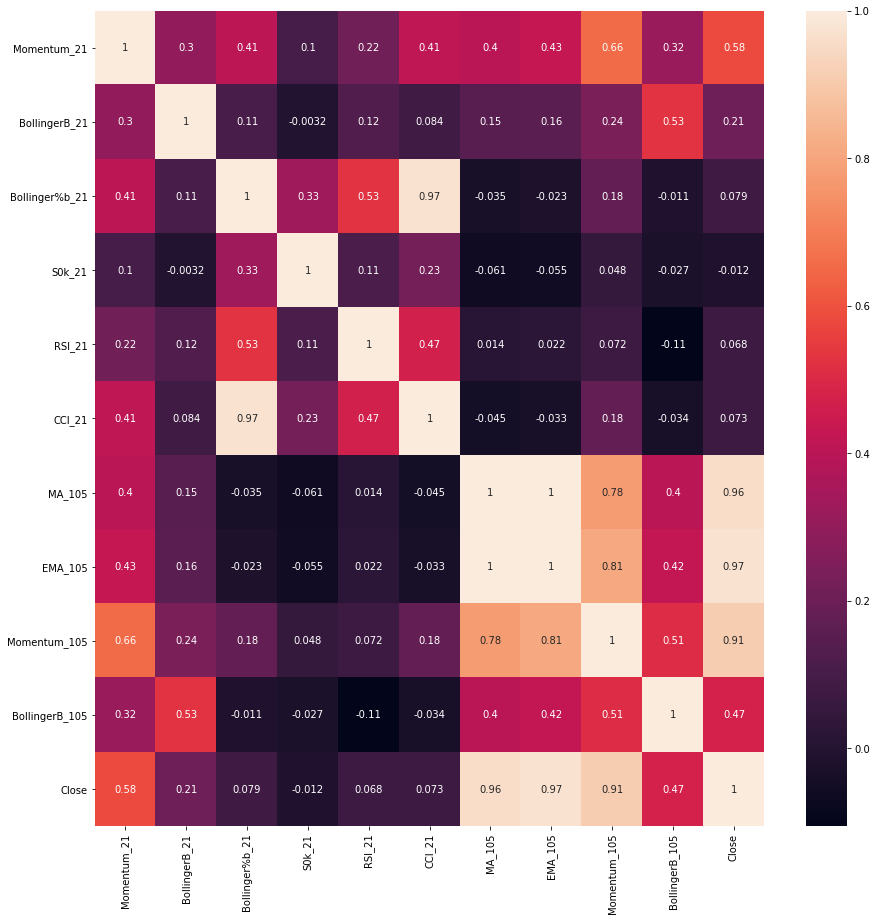

In [53]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [54]:
primeras80 = primeras80.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

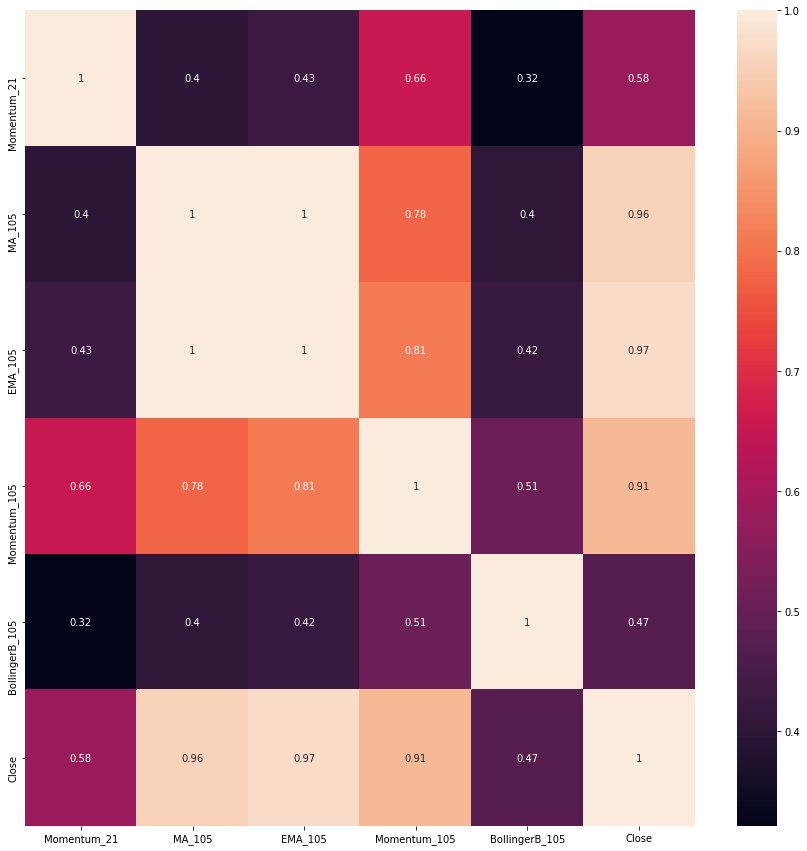

In [55]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 80:90

In [56]:
primeras90 = df2.iloc[:, 80:90]

In [57]:
primeras90['Close'] = df2.iloc[:,0]

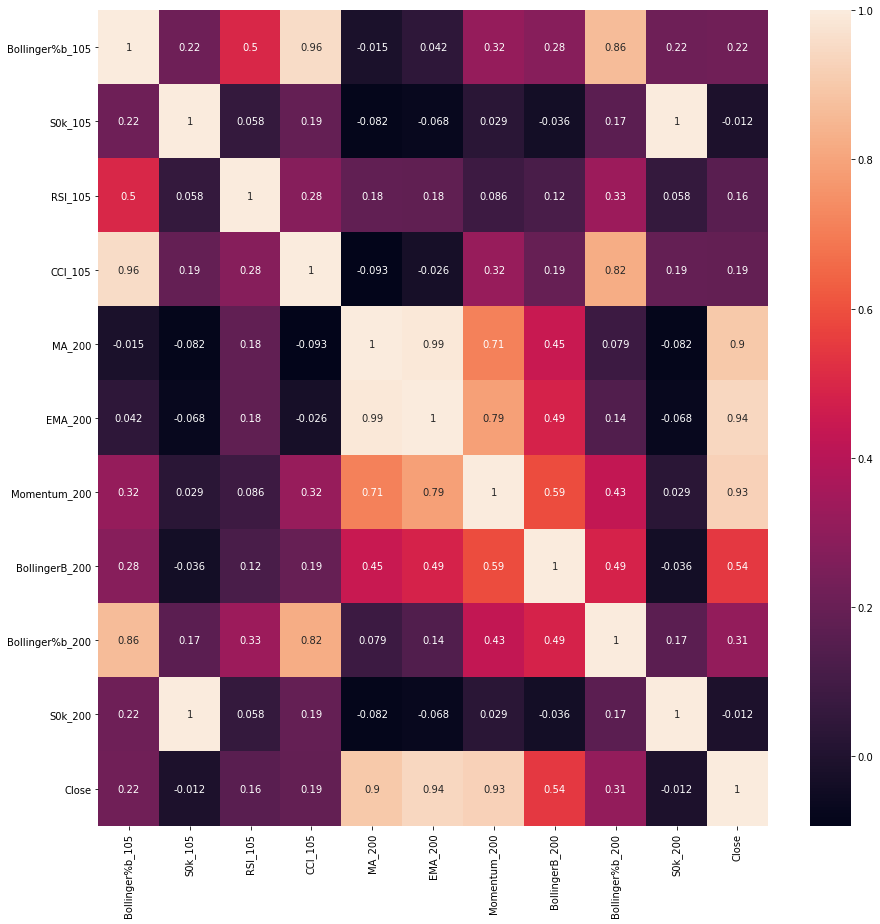

In [58]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [59]:
primeras90 = primeras90.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

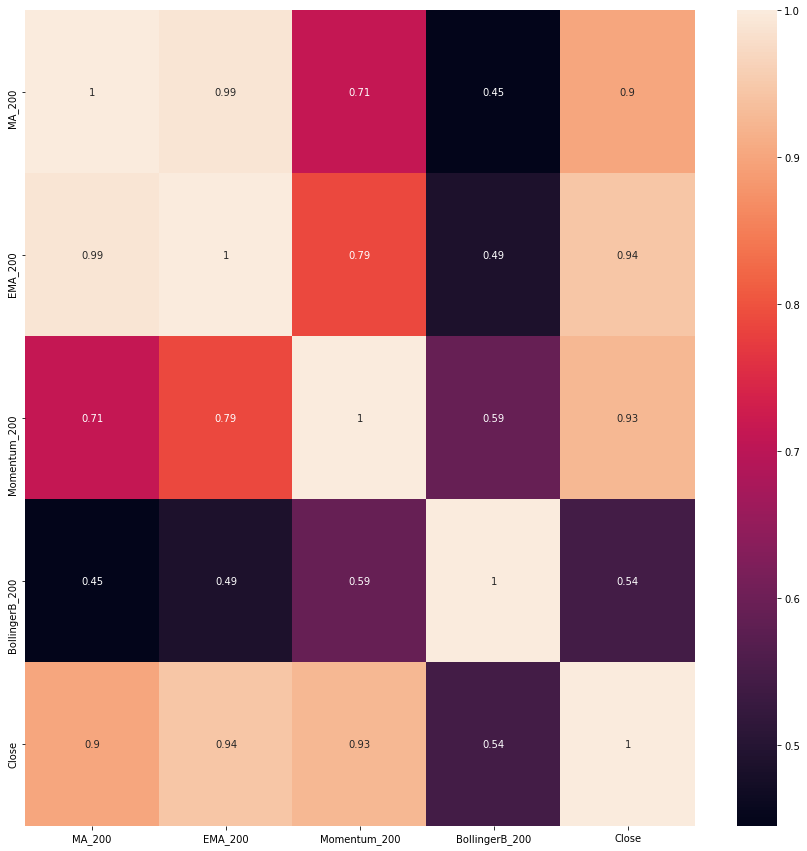

In [60]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 90:100

In [61]:
primeras100 = df2.iloc[:, 90:100]

In [62]:
primeras100['Close'] = df2.iloc[:,0]

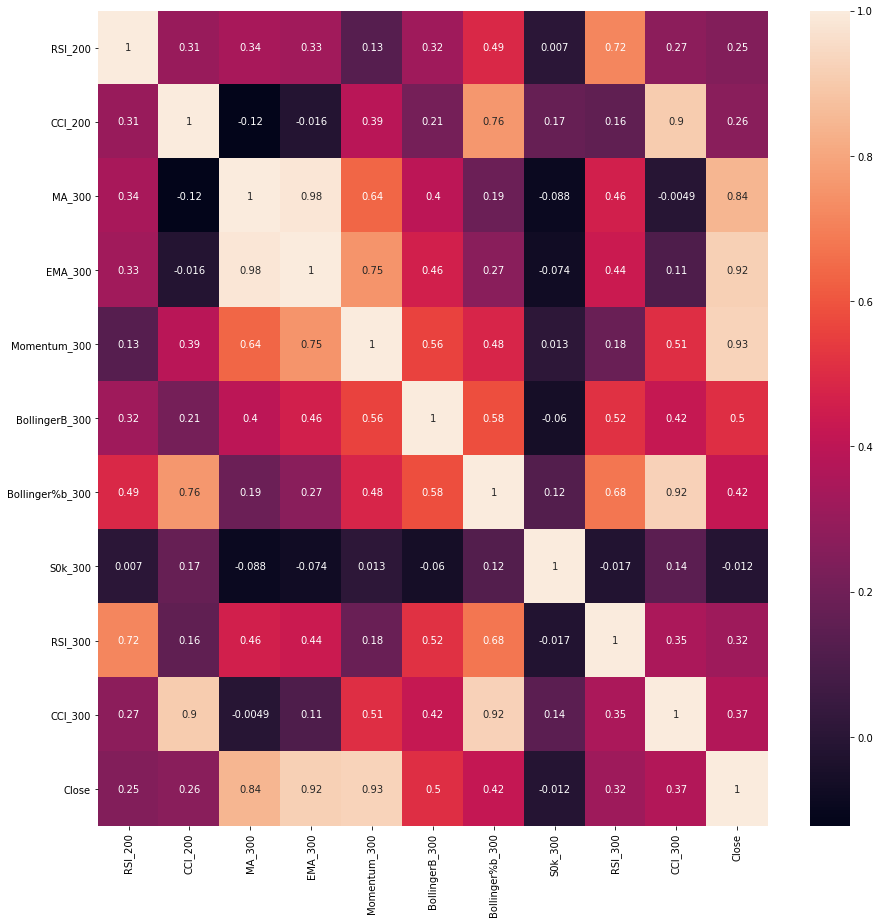

In [63]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [64]:
primeras100 = primeras100.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

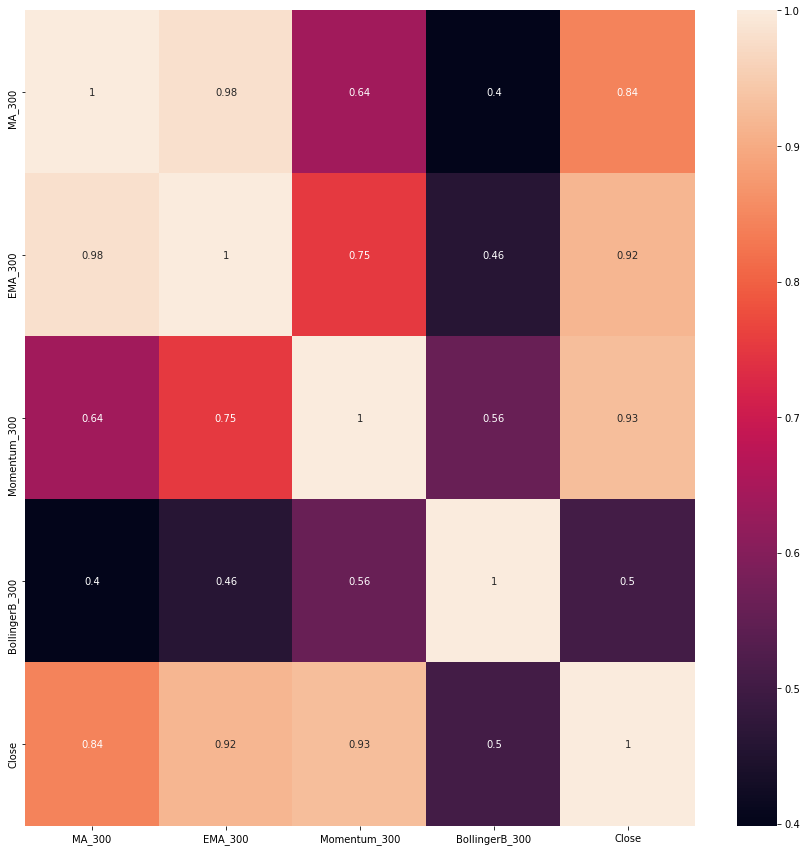

In [65]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 100:110

In [66]:
primeras110 = df2.iloc[:, 100:110]

In [67]:
primeras110['Close'] = df2.iloc[:,0]

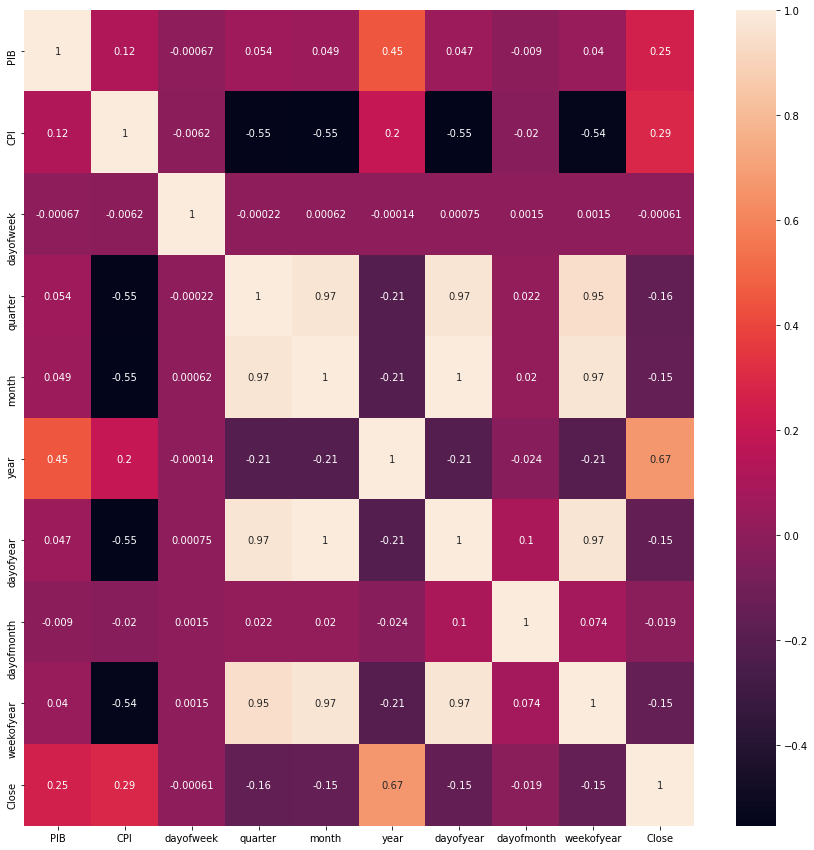

In [68]:
corrMatrix = primeras110.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [69]:
df2 = df2.drop(['Volume','Open Gold'], axis=1)

In [70]:
df2 = df2.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

In [71]:
df2 = df2.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

In [72]:
df2 = df2.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

In [73]:
df2 = df2.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

In [74]:
df2 = df2.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

In [75]:
df2 = df2.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

In [76]:
df2 = df2.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

In [77]:
df2 = df2.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

In [78]:
df2 = df2.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

In [79]:
df2

,Close,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,OpenDJ,CloseDJ,Close_eth,MA_2,EMA_2,MA_3,EMA_3,MA_5,EMA_5,MA_8,EMA_8,MA_9,EMA_9,MA_10,EMA_10,MA_15,EMA_15,Momentum_15,MA_21,EMA_21,Momentum_21,MA_105,EMA_105,Momentum_105,BollingerB_105,MA_200,EMA_200,Momentum_200,BollingerB_200,MA_300,EMA_300,Momentum_300,BollingerB_300,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,249.50,104550,0.00,0.00,0,0.0,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,6,4,10,2015,284,11,41
1,247.60,134410,2052.23,2047.93,1,1130.3,17493.17,17574.75,0.63,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0,4,10,2015,285,12,42
2,250.00,134878,2003.69,2015.00,1,1231.7,17113.55,17081.89,0.60,248.550,248.075000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,1,4,10,2015,286,13,42
3,253.00,141985,1994.24,2003.66,1,1243.6,17079.08,16924.75,0.50,248.800,249.407692,249.033333,249.242857,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,2,4,10,2015,287,14,42
4,255.26,153495,2023.86,1996.47,1,1251.4,16944.86,17141.75,0.56,251.500,251.832500,250.200000,251.246667,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,3,4,10,2015,288,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,61334.80,2639940,4185.47,4174.14,3,1779.0,34058.16,34200.67,2422.67,63059.755,63022.286415,63231.503333,62721.197245,61911.388,62026.351050,60693.26625,61170.662048,60166.620000,60938.143321,59949.073,60725.874597,59436.341333,59869.276825,4419.43,58728.003333,59061.928660,11866.20,47268.633238,47516.836950,34236.35,0.859634,32724.87720,37680.920159,52385.73,2.116348,25307.566700,31286.566728,53849.75,2.784073,56812.0,0.547438,4,2,4,2021,106,16,15
2015,60006.66,2268816,4185.47,4174.14,3,1779.0,34058.16,34200.67,2317.60,62247.390,61897.295472,62484.770000,62027.998623,62177.862,61795.834033,61100.42625,61207.137148,60764.547778,61017.474657,60283.438,60836.588306,59610.632000,60052.467222,2614.36,59028.441905,59268.553328,6309.21,47573.424762,47777.553234,32003.11,0.848792,32978.07060,37916.282148,50638.68,2.105732,25480.819533,31486.223056,51975.85,2.780519,56812.0,0.547438,5,2,4,2021,107,17,15
2016,56150.01,3444089,4185.47,4174.14,3,1779.0,34058.16,34200.67,2235.64,60670.730,60636.871824,61500.480000,61017.329311,62207.194,61199.442689,61333.44125,60940.364449,60978.896667,60815.311725,60688.759,60685.692251,59681.075333,60046.741319,1056.65,59227.942857,59335.653934,4189.52,47838.456476,48008.291098,27828.33,0.840506,33223.90150,38136.086903,49166.18,2.094127,25649.859433,31675.727896,50711.97,2.775728,56812.0,0.547438,6,2,4,2021,108,18,15
2017,55633.14,2390527,4162.80,4175.60,3,1769.4,34182.38,34077.63,2161.12,58078.335,57645.630608,59163.823333,58583.669656,60722.196,59516.298459,60881.05125,59875.841238,60757.504444,59882.251380,60496.008,59861.022751,59620.946667,59559.649904,-901.93,59245.675238,59046.049940,372.38,48058.932286,48161.908

In [80]:
df3 = df2.iloc[:, 1:48]

In [81]:
df3.shape

(2019, 47)

In [265]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(df3,dimensions = df3.columns[:8], color = 'weekofyear')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)

#fig.write_html("correlations.png")
fig.show()
# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


ValueError: ignored

<Figure size 1080x1080 with 0 Axes>

In [83]:
df2.shape

(2019, 48)

In [84]:
list(df2)

['Close',
 'NumberTransactions',
 'Close SP500',
 'Open SP500',
 'halving',
 'Close Gold',
 'OpenDJ',
 'CloseDJ',
 'Close_eth',
 'MA_2',
 'EMA_2',
 'MA_3',
 'EMA_3',
 'MA_5',
 'EMA_5',
 'MA_8',
 'EMA_8',
 'MA_9',
 'EMA_9',
 'MA_10',
 'EMA_10',
 'MA_15',
 'EMA_15',
 'Momentum_15',
 'MA_21',
 'EMA_21',
 'Momentum_21',
 'MA_105',
 'EMA_105',
 'Momentum_105',
 'BollingerB_105',
 'MA_200',
 'EMA_200',
 'Momentum_200',
 'BollingerB_200',
 'MA_300',
 'EMA_300',
 'Momentum_300',
 'BollingerB_300',
 'PIB',
 'CPI',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear']

In [85]:
dfg= pd.DataFrame()
dfg['EMA_5'] = df2['EMA_5']
dfg['Momentum_300'] = df2['Momentum_300']
dfg['dayofweek'] = df2['dayofweek']
dfg['quarter'] = df2['quarter']
dfg['month'] = df2['month']
dfg['year'] = df2['year']
dfg['dayofyear'] = df2['dayofyear']
dfg['weekofyear'] = df2['weekofyear']

In [86]:
dfg = dfg.drop(['year','dayofyear','weekofyear'], axis=1)

In [87]:
dfg = dfg.drop(['quarter','month'], axis=1)

In [88]:
dfg

,EMA_5,Momentum_300,dayofweek
0,0.000000,0.00,6
1,0.000000,0.00,0
2,0.000000,0.00,1
3,0.000000,0.00,2
4,0.000000,0.00,3
...,...,...,...
2014,62026.351050,53849.75,4
2015,61795.834033,51975.85,5
2016,61199.442689,50711.97,6
2017,59516.298459,46464.32,0


# XGBoost

In [89]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfg)

In [90]:
scaled = pd.DataFrame(scaled)
scaled = scaled.rename(columns={0:'EMA_5',
                                   1:'Momentum_300',
                                  2:'dayofweek'})
scaled

,EMA_5,Momentum_300,dayofweek
0,0.000000,0.197274,1.000000
1,0.000000,0.197274,0.000000
2,0.000000,0.197274,0.166667
3,0.000000,0.197274,0.333333
4,0.000000,0.197274,0.500000
...,...,...,...
2014,1.000000,0.996141,0.666667
2015,0.996284,0.968342,0.833333
2016,0.986668,0.949592,1.000000
2017,0.959532,0.886578,0.000000


In [91]:
X_train = scaled[:1959]
y_train = df2.Close[:1959]
X_test = scaled[1959:]
y_test = df2.Close[1959:]

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [93]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

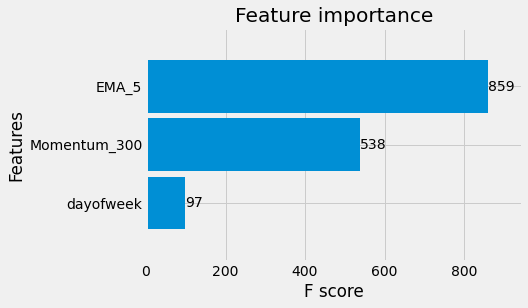

In [94]:
plot_importance(reg, height=0.9)

In [95]:
validacion = reg.predict(X_test)

In [96]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [97]:
validacion_p

,validacion
0,54861.441406
1,54861.441406
2,54991.609375
3,55393.792969
4,55625.558594
5,55470.976562
6,55761.039062
7,51783.121094
8,51612.824219
9,48192.503906


In [98]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

15858821.39474262

In [99]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

3278.1152812500004

In [100]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [101]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [102]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [103]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:34999.3
[2]	Test-rmse:27336.6
[3]	Test-rmse:22603.9
[4]	Test-rmse:18418.1
[5]	Test-rmse:15420
[6]	Test-rmse:13127.4
[7]	Test-rmse:11296.1
[8]	Test-rmse:9672.72
[9]	Test-rmse:8462.82
[10]	Test-rmse:7623.39
[11]	Test-rmse:6950.52
[12]	Test-rmse:6299.7
[13]	Test-rmse:5771.69
[14]	Test-rmse:5345.62
[15]	Test-rmse:5003.87
[16]	Test-rmse:5000.04
[17]	Test-rmse:4768.13
[18]	Test-rmse:4587.5
[19]	Test-rmse:4438.34
[20]	Test-rmse:4324.21
[21]	Test-rmse:4233.05
[22]	Test-rmse:4159.09
[23]	Test-rmse:4175.09
[24]	Test-rmse:4122.88
[25]	Test-rmse:4082.34
[26]	Test-rmse:4050.09
[27]	Test-rmse:4021.3
[28]	Test-rmse:4030
[29]	Test-rmse:4028.71
[30]	Test-rmse:4011.42
[31]	Test-rmse:4012.63
[32]	Test-rmse:4012.66
[33]	Test-rmse:4004.97
[34]	Test-rmse:4004.7
[35]	Test-rmse:4004.99
[36]	Te

In [104]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 3980.10 with 54 rounds


In [105]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,4714.187012,87.011738,4716.001790,166.431112
1,3323.325928,60.328871,3330.467773,128.382160
2,2344.070882,42.943463,2354.824381,98.628195
3,1655.147624,30.369449,1661.647787,76.235598
4,1170.811727,21.665370,1181.525553,61.336879
5,834.670552,14.429363,851.097249,48.197852
6,604.072774,9.792333,634.567301,40.125617
7,449.929993,5.832335,498.523702,32.450868
8,352.548675,3.624354,417.759633,27.502980
9,290.086192,2.959802,368.783315,23.740203


In [106]:
cv_results['test-mae-mean'].min()

308.0090126666667

In [107]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [108]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [109]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [110]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 290.6236206 for 17 rounds


In [112]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 290.6236206


In [113]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [114]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [115]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 290.6236206 for 17 rounds
CV with subsample=1.0, colsample=0.9
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13

In [116]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [117]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 289.8674684 for 17 rounds

CV with eta=0.2
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/re

In [118]:
params['eta'] = 0.01

In [119]:
params['eval_metric'] = 'mae'

In [120]:
params

{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [121]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:55152.4
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:54779.3
[2]	Test-mae:54415.3
[3]	Test-mae:54047.4
[4]	Test-mae:53688.5
[5]	Test-mae:53334.4
[6]	Test-mae:52979.9
[7]	Test-mae:52636.9
[8]	Test-mae:52289.4
[9]	Test-mae:51896.1
[10]	Test-mae:51521.8
[11]	Test-mae:51183.7
[12]	Test-mae:50812.2
[13]	Test-mae:50443.9
[14]	Test-mae:50113.5
[15]	Test-mae:49792.7
[16]	Test-mae:49434
[17]	Test-mae:49063.4
[18]	Test-mae:48705.6
[19]	Test-mae:48365
[20]	Test-mae:48018.1
[21]	Test-mae:47685.9
[22]	Test-mae:47308.7
[23]	Test-mae:46966.3
[24]	Test-mae:46670.7
[25]	Test-mae:46373.9
[26]	Test-mae:46063.4
[27]	Test-mae:45772
[28]	Test-mae:45446.2
[29]	Test-mae:45118
[30]	Test-mae:44795.5
[31]	Test-mae:44469.3
[32]	Test-mae:44193
[33]	Test-mae:43896.9
[34]	Test-mae:43625.5
[35]	Test-mae:43321.8
[36]	Test-mae:42996.6
[37]	Test-mae:42661.4


In [122]:
dtrain2 = xgb.DMatrix(X_test)

In [123]:
validacion = best_model_Users.predict(dtrain2)

In [124]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [125]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

49863296.46023162

In [126]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

6234.753796875

In [127]:
y_pru = y_test

In [128]:
y_pru = y_pru.reset_index()

In [129]:
y_pru

,index,Close
0,1959,55841.19
1,1960,57408.57
2,1961,54087.67
3,1962,48891.00
4,1963,49676.20
5,1964,47073.73
6,1965,46276.87
7,1966,46106.43
8,1967,45135.66
9,1968,49587.03


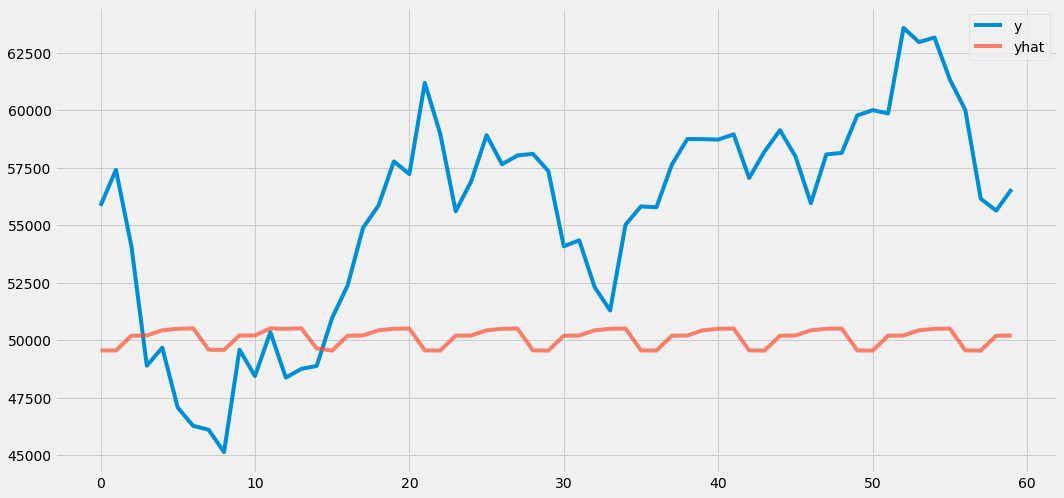

In [130]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [131]:
dtrain2 = xgb.DMatrix(scaled)

In [132]:
validacion = best_model_Users.predict(dtrain2)

In [133]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

,validacion
0,264.683929
1,262.715973
2,262.532379
3,262.538116
4,264.371094
...,...
2014,50506.828125
2015,49557.140625
2016,49548.632812
2017,50195.226562


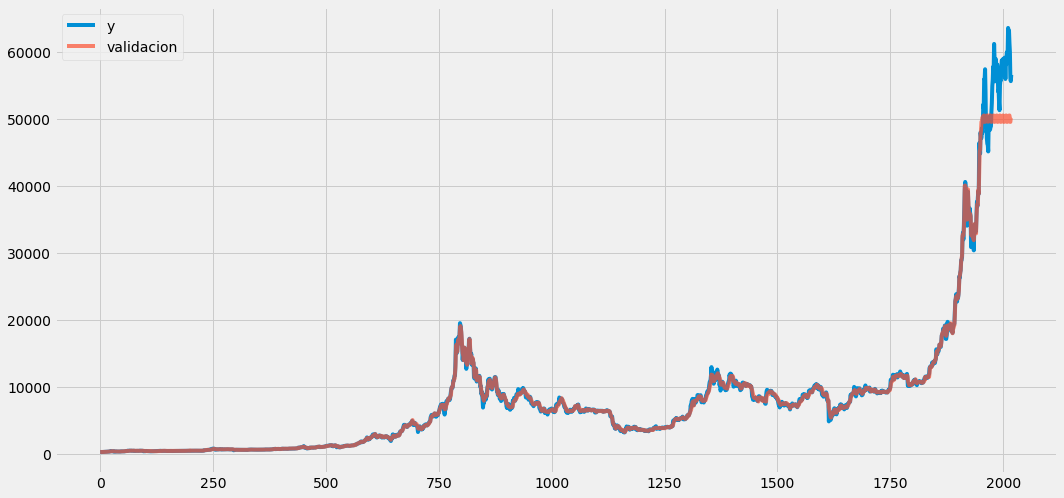

In [134]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [135]:
!pip install shap

     |████████████████████████████████| 358kB 7.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=3f432b334078966f2d092580eb75b2c108c14b5e9c309d50a7faf91a39f674e8
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [136]:
!pip install eli5

     |████████████████████████████████| 112kB 8.7MB/s 


In [137]:
!pip install lime

     |████████████████████████████████| 276kB 9.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=48f0977aaece5e9834ca0c71b29d85e524888067e8272b2c276f4668aa9d7316
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [138]:
from collections import Counter
import shap
import eli5
import lime
from lime.lime_tabular import LimeTabularExplainer
shap.initjs()

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [139]:
!pip install s3fs

     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 112kB 15.5MB/s 
     |████████████████████████████████| 7.4MB 9.4MB/s 
     |████████████████████████████████| 1.3MB 52.3MB/s 
     |████████████████████████████████| 153kB 55.6MB/s 
     |████████████████████████████████| 296kB 46.3MB/s 
     |████████████████████████████████| 143kB 41.3MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.3.0-cp37-none-any.whl size=45781 sha256=c9e397efdb7c5b4239f44e3ddb081a085134fe93060cf17be7c92013716c8a86
  Stored in directory: /root/.cache/pip/wheels/1d/5b/92/72a47210109971364c619c41e29289d4e7d58269f0cc653bf1
Successfully built aiobotocore
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib

In [140]:
import time
from scipy import stats
import datetime
import s3fs
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

import pandas as pd, numpy as np, os, random, math, matplotlib, pylab, scipy, gc

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor

random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [141]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6695.842


,0,1,2
0,37498.402344,5656.795410,-291.420502
1,37522.089844,5648.786133,-315.665771
2,37675.789062,5754.878418,70.963005
3,37671.113281,5766.779785,74.196236
4,37747.195312,5811.588867,178.835739


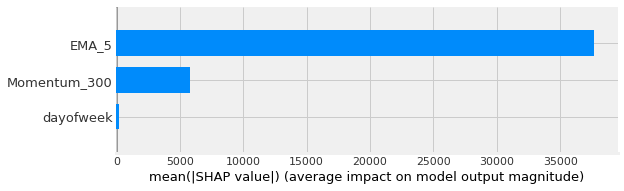

In [142]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=30)

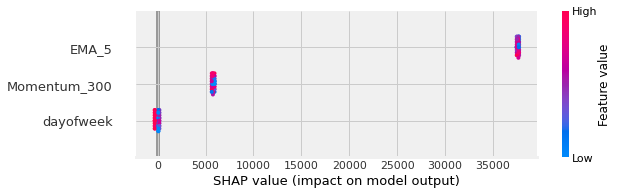

In [143]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=30)

#Hasta aqui

In [ ]:
2019*0.7


1413.3

In [ ]:
2019*0.15

302.84999999999997

In [ ]:
1413+303

1716

In [145]:
df2

,Close,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,OpenDJ,CloseDJ,Close_eth,MA_2,EMA_2,MA_3,EMA_3,MA_5,EMA_5,MA_8,EMA_8,MA_9,EMA_9,MA_10,EMA_10,MA_15,EMA_15,Momentum_15,MA_21,EMA_21,Momentum_21,MA_105,EMA_105,Momentum_105,BollingerB_105,MA_200,EMA_200,Momentum_200,BollingerB_200,MA_300,EMA_300,Momentum_300,BollingerB_300,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,249.50,104550,0.00,0.00,0,0.0,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,6,4,10,2015,284,11,41
1,247.60,134410,2052.23,2047.93,1,1130.3,17493.17,17574.75,0.63,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0,4,10,2015,285,12,42
2,250.00,134878,2003.69,2015.00,1,1231.7,17113.55,17081.89,0.60,248.550,248.075000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,1,4,10,2015,286,13,42
3,253.00,141985,1994.24,2003.66,1,1243.6,17079.08,16924.75,0.50,248.800,249.407692,249.033333,249.242857,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,2,4,10,2015,287,14,42
4,255.26,153495,2023.86,1996.47,1,1251.4,16944.86,17141.75,0.56,251.500,251.832500,250.200000,251.246667,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,3,4,10,2015,288,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,61334.80,2639940,4185.47,4174.14,3,1779.0,34058.16,34200.67,2422.67,63059.755,63022.286415,63231.503333,62721.197245,61911.388,62026.351050,60693.26625,61170.662048,60166.620000,60938.143321,59949.073,60725.874597,59436.341333,59869.276825,4419.43,58728.003333,59061.928660,11866.20,47268.633238,47516.836950,34236.35,0.859634,32724.87720,37680.920159,52385.73,2.116348,25307.566700,31286.566728,53849.75,2.784073,56812.0,0.547438,4,2,4,2021,106,16,15
2015,60006.66,2268816,4185.47,4174.14,3,1779.0,34058.16,34200.67,2317.60,62247.390,61897.295472,62484.770000,62027.998623,62177.862,61795.834033,61100.42625,61207.137148,60764.547778,61017.474657,60283.438,60836.588306,59610.632000,60052.467222,2614.36,59028.441905,59268.553328,6309.21,47573.424762,47777.553234,32003.11,0.848792,32978.07060,37916.282148,50638.68,2.105732,25480.819533,31486.223056,51975.85,2.780519,56812.0,0.547438,5,2,4,2021,107,17,15
2016,56150.01,3444089,4185.47,4174.14,3,1779.0,34058.16,34200.67,2235.64,60670.730,60636.871824,61500.480000,61017.329311,62207.194,61199.442689,61333.44125,60940.364449,60978.896667,60815.311725,60688.759,60685.692251,59681.075333,60046.741319,1056.65,59227.942857,59335.653934,4189.52,47838.456476,48008.291098,27828.33,0.840506,33223.90150,38136.086903,49166.18,2.094127,25649.859433,31675.727896,50711.97,2.775728,56812.0,0.547438,6,2,4,2021,108,18,15
2017,55633.14,2390527,4162.80,4175.60,3,1769.4,34182.38,34077.63,2161.12,58078.335,57645.630608,59163.823333,58583.669656,60722.196,59516.298459,60881.05125,59875.841238,60757.504444,59882.251380,60496.008,59861.022751,59620.946667,59559.649904,-901.93,59245.675238,59046.049940,372.38,48058.932286,48161.908

df2.shape()

# XGBoost

In [146]:
df2

,Close,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,OpenDJ,CloseDJ,Close_eth,MA_2,EMA_2,MA_3,EMA_3,MA_5,EMA_5,MA_8,EMA_8,MA_9,EMA_9,MA_10,EMA_10,MA_15,EMA_15,Momentum_15,MA_21,EMA_21,Momentum_21,MA_105,EMA_105,Momentum_105,BollingerB_105,MA_200,EMA_200,Momentum_200,BollingerB_200,MA_300,EMA_300,Momentum_300,BollingerB_300,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,249.50,104550,0.00,0.00,0,0.0,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,6,4,10,2015,284,11,41
1,247.60,134410,2052.23,2047.93,1,1130.3,17493.17,17574.75,0.63,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0,4,10,2015,285,12,42
2,250.00,134878,2003.69,2015.00,1,1231.7,17113.55,17081.89,0.60,248.550,248.075000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,1,4,10,2015,286,13,42
3,253.00,141985,1994.24,2003.66,1,1243.6,17079.08,16924.75,0.50,248.800,249.407692,249.033333,249.242857,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,2,4,10,2015,287,14,42
4,255.26,153495,2023.86,1996.47,1,1251.4,16944.86,17141.75,0.56,251.500,251.832500,250.200000,251.246667,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,3,4,10,2015,288,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,61334.80,2639940,4185.47,4174.14,3,1779.0,34058.16,34200.67,2422.67,63059.755,63022.286415,63231.503333,62721.197245,61911.388,62026.351050,60693.26625,61170.662048,60166.620000,60938.143321,59949.073,60725.874597,59436.341333,59869.276825,4419.43,58728.003333,59061.928660,11866.20,47268.633238,47516.836950,34236.35,0.859634,32724.87720,37680.920159,52385.73,2.116348,25307.566700,31286.566728,53849.75,2.784073,56812.0,0.547438,4,2,4,2021,106,16,15
2015,60006.66,2268816,4185.47,4174.14,3,1779.0,34058.16,34200.67,2317.60,62247.390,61897.295472,62484.770000,62027.998623,62177.862,61795.834033,61100.42625,61207.137148,60764.547778,61017.474657,60283.438,60836.588306,59610.632000,60052.467222,2614.36,59028.441905,59268.553328,6309.21,47573.424762,47777.553234,32003.11,0.848792,32978.07060,37916.282148,50638.68,2.105732,25480.819533,31486.223056,51975.85,2.780519,56812.0,0.547438,5,2,4,2021,107,17,15
2016,56150.01,3444089,4185.47,4174.14,3,1779.0,34058.16,34200.67,2235.64,60670.730,60636.871824,61500.480000,61017.329311,62207.194,61199.442689,61333.44125,60940.364449,60978.896667,60815.311725,60688.759,60685.692251,59681.075333,60046.741319,1056.65,59227.942857,59335.653934,4189.52,47838.456476,48008.291098,27828.33,0.840506,33223.90150,38136.086903,49166.18,2.094127,25649.859433,31675.727896,50711.97,2.775728,56812.0,0.547438,6,2,4,2021,108,18,15
2017,55633.14,2390527,4162.80,4175.60,3,1769.4,34182.38,34077.63,2161.12,58078.335,57645.630608,59163.823333,58583.669656,60722.196,59516.298459,60881.05125,59875.841238,60757.504444,59882.251380,60496.008,59861.022751,59620.946667,59559.649904,-901.93,59245.675238,59046.049940,372.38,48058.932286,48161.908

In [147]:
X = df2.iloc[:, 1:48]
y = df2.iloc[:, [0]]

In [150]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [151]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [152]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [153]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

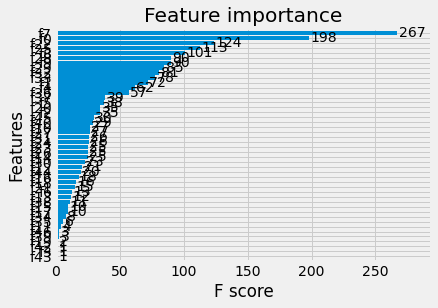

In [154]:
plot_importance(reg, height=0.9)

In [155]:
validacion = reg.predict(X_test)

In [156]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [157]:
validacion_p

,validacion
0,52280.648438
1,52322.777344
2,49149.738281
3,41362.074219
4,39392.011719
5,39167.855469
6,39999.484375
7,39128.117188
8,38419.382812
9,38859.246094


In [158]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

84589115.43380146

In [159]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

8748.589427083332

In [160]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [161]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [162]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [163]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:35111.8
[2]	Test-rmse:28230.5
[3]	Test-rmse:23267.9
[4]	Test-rmse:20230.5
[5]	Test-rmse:18257.9
[6]	Test-rmse:16511.7
[7]	Test-rmse:14679.3
[8]	Test-rmse:13490.9
[9]	Test-rmse:12286.1
[10]	Test-rmse:11749.3
[11]	Test-rmse:11257.6
[12]	Test-rmse:10976.2
[13]	Test-rmse:10702.9
[14]	Test-rmse:10469.7
[15]	Test-rmse:10191.6
[16]	Test-rmse:10023.2
[17]	Test-rmse:9907.53
[18]	Test-rmse:9819.53
[19]	Test-rmse:9746
[20]	Test-rmse:9690.35
[21]	Test-rmse:9629.49
[22]	Test-rmse:9544.46
[23]	Test-rmse:9515.08
[24]	Test-rmse:9499.07
[25]	Test-rmse:9492.48
[26]	Test-rmse:9474.77
[27]	Test-rmse:9441.19
[28]	Test-rmse:9440.1
[29]	Test-rmse:9437.93
[30]	Test-rmse:9437.21
[31]	Test-rmse:9434.04
[32]	Test-rmse:9432.44
[33]	Test-rmse:9433.17
[34]	Test-rmse:9410.03
[35]	Test-rmse:9409.6
[36

In [164]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 9356.24 with 66 rounds


In [165]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,4715.875000,86.380293,4718.087728,151.919904
1,3325.403646,61.119230,3331.196452,115.455747
2,2347.658285,44.343282,2349.031413,85.288613
3,1656.656250,31.776599,1658.266480,62.248700
4,1171.023967,21.594943,1172.914713,49.989589
5,829.037842,14.749084,837.639119,39.579230
6,589.536825,9.763339,610.607462,34.783825
7,423.207265,6.855690,463.264282,31.946828
8,311.010752,4.567790,372.070272,30.404953
9,236.354853,4.016269,318.341553,29.793919


In [166]:
cv_results['test-mae-mean'].min()

255.92066433333335

In [167]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [168]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [169]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [170]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [171]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 241.7743132 for 19 rounds


In [172]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 241.7743132


In [173]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [174]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [175]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 241.7743132 for 19 rounds
CV with subsample=1.0, colsample=0.9
[17:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49

In [176]:
params['subsample'] = 0.9
params['colsample_bytree'] = 0.7

In [177]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 236.33927919999996 for 57 rounds

CV with eta=0.2
[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:44] WARNING: /workspace/src/objec

In [178]:
params['eta'] = 0.01

In [179]:
params['eval_metric'] = 'mae'

In [180]:
params

{'colsample_bytree': 0.7,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [230]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[18:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:55157.7
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:54784.6
[2]	Test-mae:54420.5
[3]	Test-mae:54052.6
[4]	Test-mae:53693.7
[5]	Test-mae:53344.6
[6]	Test-mae:52990.1
[7]	Test-mae:52647.1
[8]	Test-mae:52299.5
[9]	Test-mae:51956
[10]	Test-mae:51590.3
[11]	Test-mae:51236.2
[12]	Test-mae:50871.8
[13]	Test-mae:50503.1
[14]	Test-mae:50154
[15]	Test-mae:49833.1
[16]	Test-mae:49495.2
[17]	Test-mae:49129.2
[18]	Test-mae:48785
[19]	Test-mae:48452.1
[20]	Test-mae:48104.6
[21]	Test-mae:47772.6
[22]	Test-mae:47421.6
[23]	Test-mae:47078.5
[24]	Test-mae:46782.6
[25]	Test-mae:46416
[26]	Test-mae:46102.6
[27]	Test-mae:45777.2
[28]	Test-mae:45419.1
[29]	Test-mae:45090.7
[30]	Test-mae:44767.9
[31]	Test-mae:44434.6
[32]	Test-mae:44124.1
[33]	Test-mae:43781.5
[34]	Test-mae:43509.7
[35]	Test-mae:43204.8
[36]	Test-mae:42877.4
[37]	Test-mae:42565.

In [231]:
dtrain2 = xgb.DMatrix(X_test)

In [232]:
validacion = best_model_Users.predict(dtrain2)

In [233]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [234]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

83567128.98901477

In [235]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

8804.263059895833

In [236]:
y_pru = y_test

In [237]:
y_pru = y_pru.reset_index()

In [238]:
y_pru

,index,Close
0,1959,55841.19
1,1960,57408.57
2,1961,54087.67
3,1962,48891.00
4,1963,49676.20
5,1964,47073.73
6,1965,46276.87
7,1966,46106.43
8,1967,45135.66
9,1968,49587.03


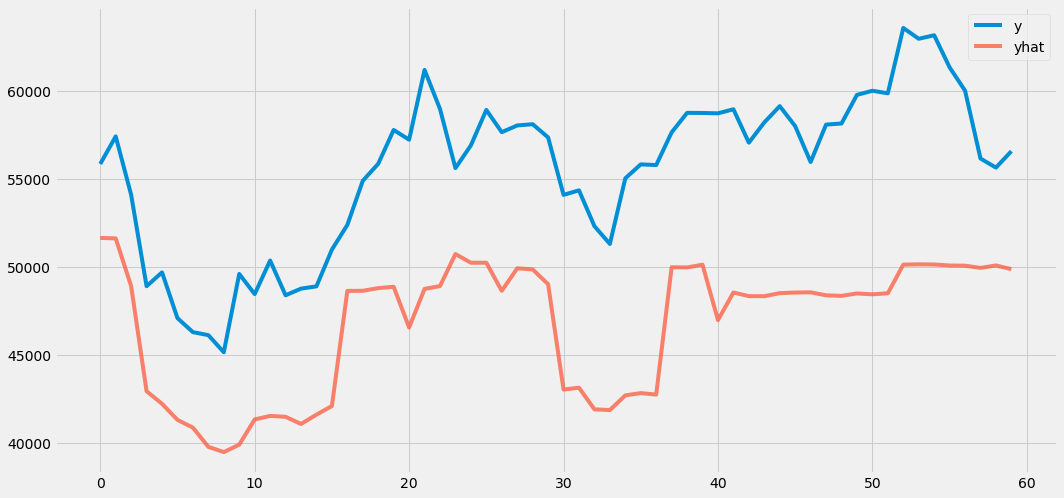

In [239]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [240]:
dtrain2 = xgb.DMatrix(scaled)

In [241]:
validacion = best_model_Users.predict(dtrain2)

In [242]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

,validacion
0,260.605560
1,260.162292
2,260.607452
3,260.896881
4,261.728668
...,...
2014,50067.078125
2015,50057.250000
2016,49930.644531
2017,50070.500000


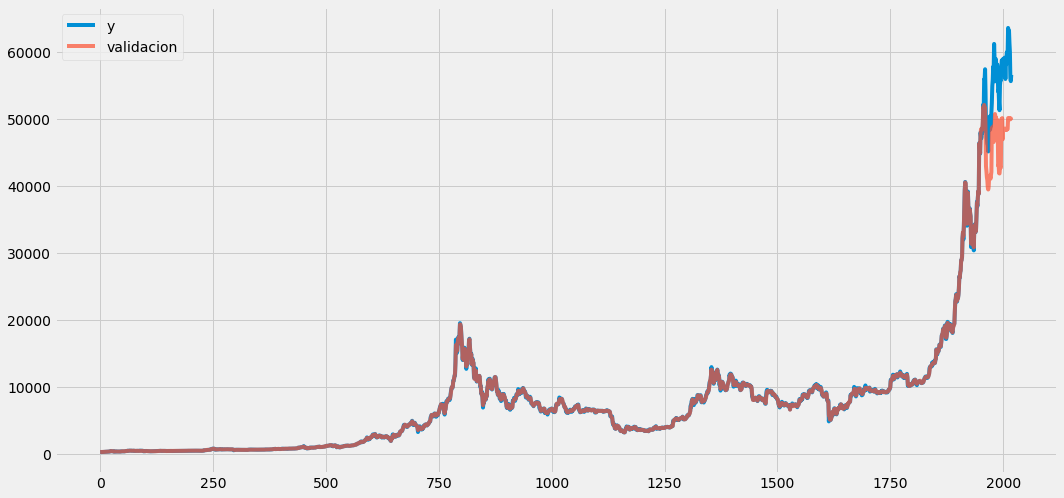

In [243]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [244]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6696.048


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,117.710274,1435.468384,444.305115,0.129061,59.141781,31.226200,246.934067,4218.136230,12097.685547,11661.826172,3279.645264,1345.848877,984.149231,472.566772,109.072235,603.530090,220.947998,262.424500,152.067825,232.957657,2316.477783,904.030212,-53.034096,84.948830,131.487610,913.815918,57.483162,241.909805,501.326019,4.416358,33.034794,131.118759,1165.546387,18.743322,-14.397012,0.442898,460.403381,13.449612,-0.032361,0.302227,-23.015593,-0.072148,-1.548766,0.282722,39.531807,8.068994,27.721289
1,208.237595,1438.442627,444.329010,0.129061,59.441509,32.939075,246.950485,4170.051270,12109.503906,11656.643555,3277.695068,1340.921143,975.924072,464.053192,108.447075,602.681152,218.715637,262.605682,153.582962,232.123718,2314.769775,904.389038,-59.740913,77.592308,131.656967,916.207642,50.452091,241.325150,504.951660,4.118163,33.028439,131.874313,1163.750244,18.114033,-14.368828,0.487415,457.933105,13.306052,-0.034604,0.302223,-25.622988,-0.048567,-1.426248,0.282722,40.113621,-20.524502,27.440292
2,91.122459,874.332581,123.262337,0.138829,57.401394,39.756504,251.168655,3022.402344,12038.976562,11622.308594,3261.586426,1336.153564,985.536011,425.100098,104.902679,599.784363,188.415771,259.893921,155.034164,231.725250,2123.931152,900.570923,-11.464820,-11.048175,122.505028,907.976318,57.570148,242.179550,431.128754,6.111768,32.936581,131.488129,1094.398926,12.661236,-14.486374,0.283146,439.261017,10.220029,-0.030810,0.302549,17.933933,-0.061410,-1.528126,0.212448,38.771278,-29.623299,26.899307
3,80.688210,777.079834,110.864632,0.138829,70.274185,37.885315,251.418015,-0.224311,11119.851562,11058.083984,2863.770264,1306.705322,850.428162,378.296204,85.180809,599.246826,183.814056,260.334961,155.837296,231.095169,1786.395752,733.733215,12.056455,-55.933899,122.657440,912.216003,57.412418,242.214355,383.548859,6.218031,32.954197,131.138611,1001.160950,11.337366,-14.487597,0.284203,439.270386,10.540274,-0.030069,0.298481,16.747059,-0.061410,-1.528126,0.209560,39.024265,-91.917488,26.905680
4,117.452957,1316.104370,110.308907,0.138829,75.298004,37.094334,238.528656,72.121941,10964.208008,10969.560547,2837.386719,1297.726074,825.718140,350.361908,95.962936,601.359985,207.682388,264.885468,178.386703,230.351578,1911.154907,746.829895,-54.324173,-91.150291,92.762222,-51.611038,50.810764,242.055161,339.852020,4.257496,32.141327,111.206528,960.640076,7.626724,-14.537004,0.947076,440.897644,10.783716,-0.039778,0.386047,18.057373,-0.015390,-1.593547,0.213208,39.123089,-106.249268,26.995474


In [255]:
df2.columns.values[[8,1,10,26]]

array(['Close_eth', 'NumberTransactions', 'EMA_2', 'Momentum_21'],
      dtype=object)

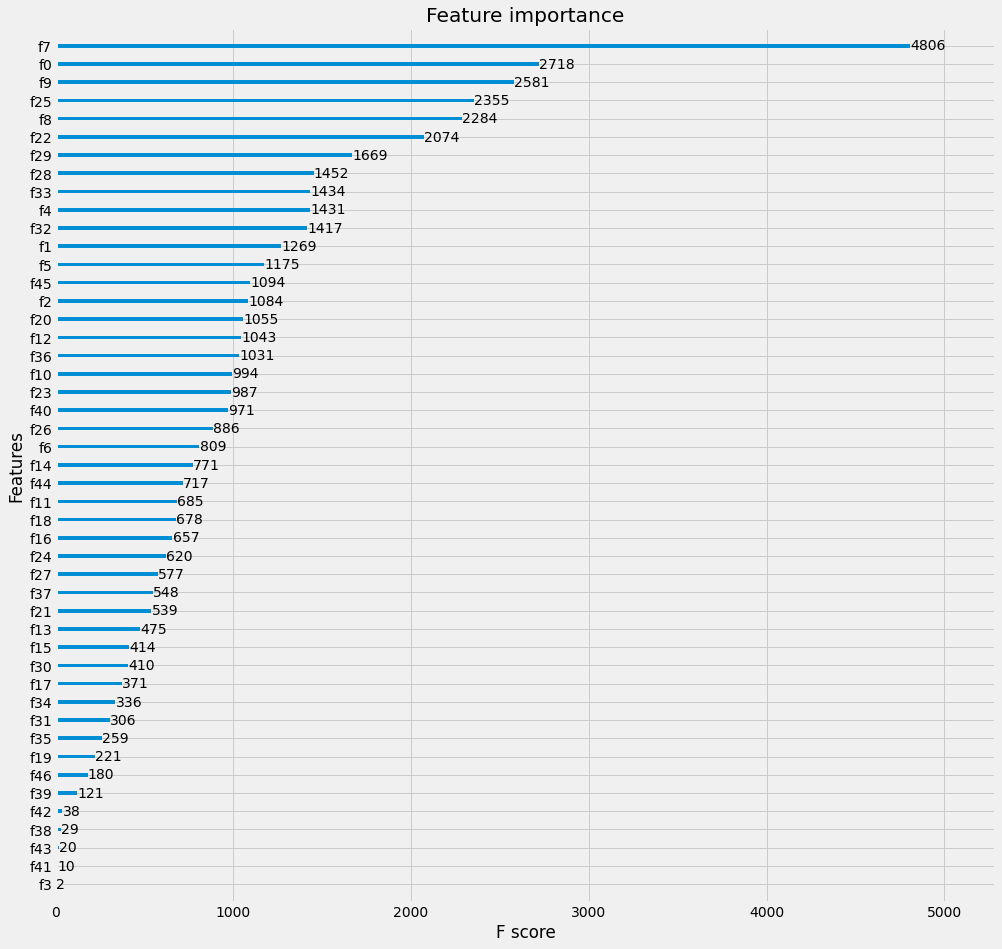

In [256]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

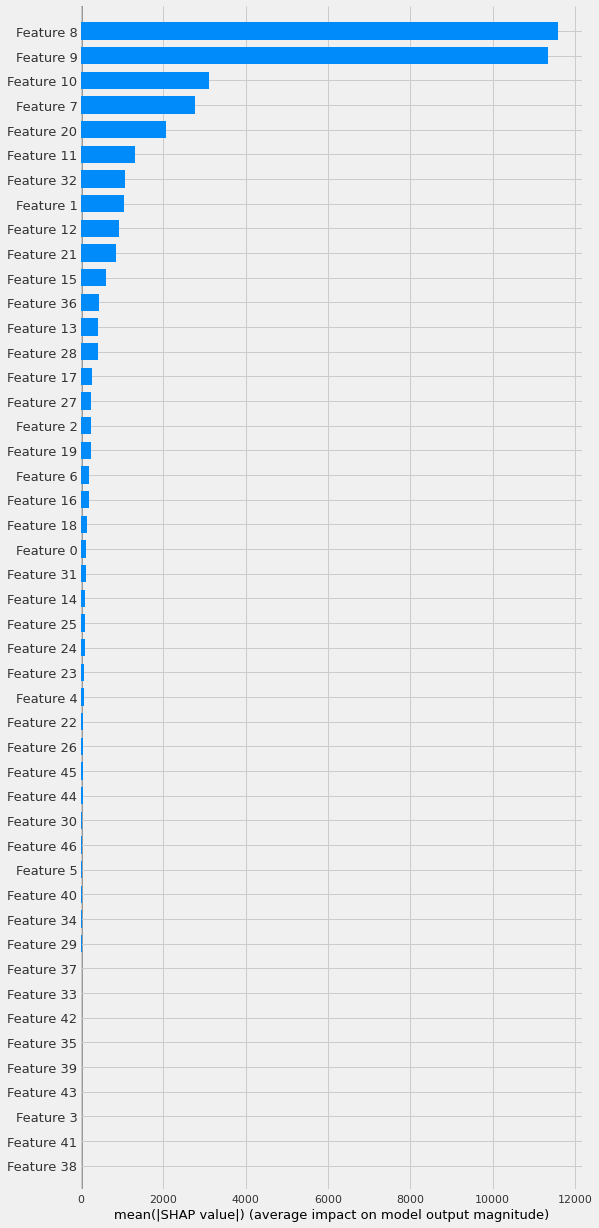

In [257]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

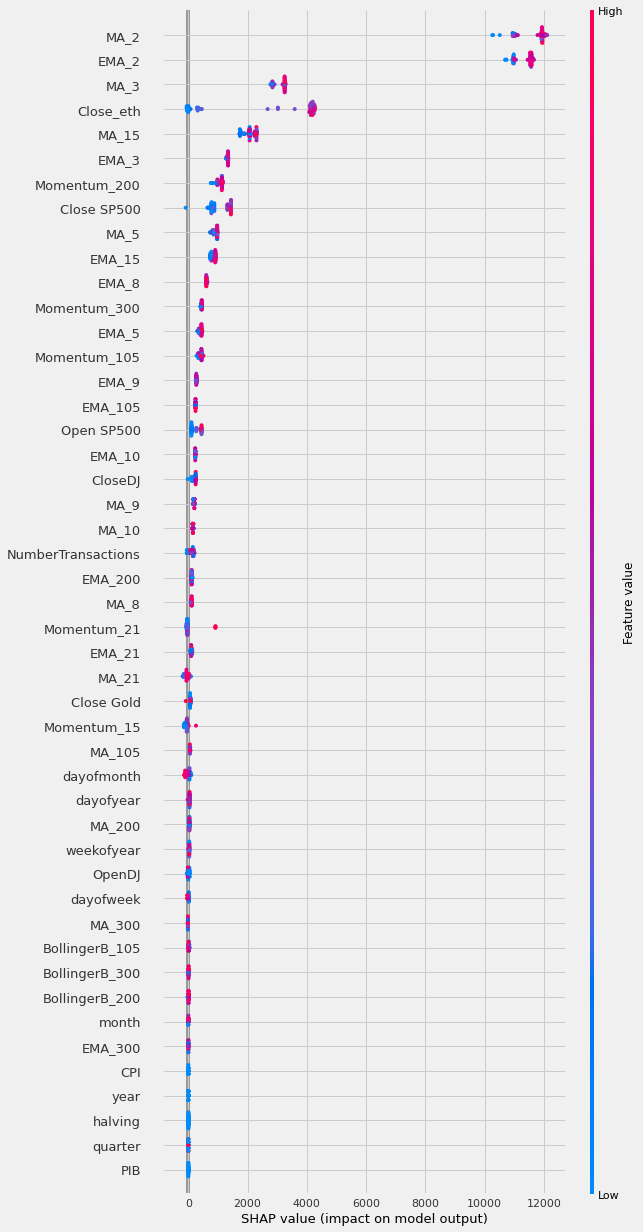

In [200]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [266]:
X

,NumberTransactions,Close SP500,Open SP500,halving,Close Gold,OpenDJ,CloseDJ,Close_eth,MA_2,EMA_2,MA_3,EMA_3,MA_5,EMA_5,MA_8,EMA_8,MA_9,EMA_9,MA_10,EMA_10,MA_15,EMA_15,Momentum_15,MA_21,EMA_21,Momentum_21,MA_105,EMA_105,Momentum_105,BollingerB_105,MA_200,EMA_200,Momentum_200,BollingerB_200,MA_300,EMA_300,Momentum_300,BollingerB_300,PIB,CPI,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,104550,0.00,0.00,0,0.0,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,6,4,10,2015,284,11,41
1,134410,2052.23,2047.93,1,1130.3,17493.17,17574.75,0.63,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,0,4,10,2015,285,12,42
2,134878,2003.69,2015.00,1,1231.7,17113.55,17081.89,0.60,248.550,248.075000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,1,4,10,2015,286,13,42
3,141985,1994.24,2003.66,1,1243.6,17079.08,16924.75,0.50,248.800,249.407692,249.033333,249.242857,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,2,4,10,2015,287,14,42
4,153495,2023.86,1996.47,1,1251.4,16944.86,17141.75,0.56,251.500,251.832500,250.200000,251.246667,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,54420.0,-0.044968,3,4,10,2015,288,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2639940,4185.47,4174.14,3,1779.0,34058.16,34200.67,2422.67,63059.755,63022.286415,63231.503333,62721.197245,61911.388,62026.351050,60693.26625,61170.662048,60166.620000,60938.143321,59949.073,60725.874597,59436.341333,59869.276825,4419.43,58728.003333,59061.928660,11866.20,47268.633238,47516.836950,34236.35,0.859634,32724.87720,37680.920159,52385.73,2.116348,25307.566700,31286.566728,53849.75,2.784073,56812.0,0.547438,4,2,4,2021,106,16,15
2015,2268816,4185.47,4174.14,3,1779.0,34058.16,34200.67,2317.60,62247.390,61897.295472,62484.770000,62027.998623,62177.862,61795.834033,61100.42625,61207.137148,60764.547778,61017.474657,60283.438,60836.588306,59610.632000,60052.467222,2614.36,59028.441905,59268.553328,6309.21,47573.424762,47777.553234,32003.11,0.848792,32978.07060,37916.282148,50638.68,2.105732,25480.819533,31486.223056,51975.85,2.780519,56812.0,0.547438,5,2,4,2021,107,17,15
2016,3444089,4185.47,4174.14,3,1779.0,34058.16,34200.67,2235.64,60670.730,60636.871824,61500.480000,61017.329311,62207.194,61199.442689,61333.44125,60940.364449,60978.896667,60815.311725,60688.759,60685.692251,59681.075333,60046.741319,1056.65,59227.942857,59335.653934,4189.52,47838.456476,48008.291098,27828.33,0.840506,33223.90150,38136.086903,49166.18,2.094127,25649.859433,31675.727896,50711.97,2.775728,56812.0,0.547438,6,2,4,2021,108,18,15
2017,2390527,4162.80,4175.60,3,1769.4,34182.38,34077.63,2161.12,58078.335,57645.630608,59163.823333,58583.669656,60722.196,59516.298459,60881.05125,59875.841238,60757.504444,59882.251380,60496.008,59861.022751,59620.946667,59559.649904,-901.93,59245.675238,59046.049940,372.38,48058.932286,48161.908435,23149.96,0.830409,33450.76860,38315.329920,45373.42,2.080122,25804.740500,318